**About the Data:**

The dataset consisting all the basic details of bank details of the customers, and the dataset has variables like categorical, and numerical. It has missing values and more anomalies. It consisting the customer's bank details and processional details over the years so we can explore more of it.  You have given the two data sets namely Train and Test datasets. Kindly use the TRAIN dataset to build and test the model. And use the Test dataset to submit your results.

SUBMISSION INSTRUCTIONS:
Predict the labels for the test dataset. And combine the same with ID.
Save it as a data frame.
And Upload the same predicted file with the solution file in a zip folder.
Do not drop any rows, The number of rows should be matched with the sample output that has attached below.

**Attributes:**

ID - Represents a unique identification of an entry.

CUSTOMER ID - Represents the unique identification of a person.

MONTH - Represents the month of the year.

NAME - Represents the name of a person.

AGE - Represents the age of the person.

SSN - Represents the social security number of the person.

OCCUPATION - Represents the occupation of the person.

ANNUAL INCOME - Represents the yearly income of the person.

MONTHLY IN-HAND SALARY - Represents the monthly base salary of a person.

NUM BANK ACCOUNTS - Represents the number of bank accounts a person holds.

NUM CREDIT CARD - Represents the number of other credit cards held by the person.

INTEREST Rate - Represents the interest rate on a credit card.

NUM OF LOAN - Represents the number of loans taken from the bank.

TYPE OF LOAN - Represents the type of loan taken by the person.

DELAY FROM DUE DATE - Represents the average number of days delayed from the payment date.

NUM OF DELAYED PAYMENT - Represents the average number of payments delayed by a person.

CHANGED CREDIT LIMIT - Represents the percentage change in credit card limit.

NUM CREDIT INQUIRIES - Represents the number of credit card inquiries.

CREDIT MIX - Represents the classification of the mix of credits.

OUTSTANDING DEBT - Represents the remaining debt to be paid(in USD).

CREDIT UTILIZATION RATIO - Represents the utilization ratio of the credit cards.

CREDIT HISTORY AGE - Represents the age of credit history of the person.

PAYMENT OF MIN AMOUNT - Represents whether only the minimum amount was paid by the person.

TOTAL EMI PER MONTH - Represents the monthly EMI payments(in USD).




**Title: Classification model**


**Problem Statement:**

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce manual efforts.

**Objective:** 

The objective of this project is to explore the data to identify the pattern that causes the person to become a good or bad or standard type credit score and build a machine learning model that should be able to predict or classify the credit score type.


### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Set Options 

In [5]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set(style = 'whitegrid')
pd.options.display.float_format = '{:.6f}'.format

### Read Data 

In [7]:
Train_data = pd.read_csv('train.csv')
Test_data = pd.read_csv('test.csv')

#### Sample record

In [9]:
Train_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.000000,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.000000,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.000000,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.000000,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.000000,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [10]:
Test_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.000000,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.000000,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.000000,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.000000,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.000000,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


### Data Analysis 

#### Dimensions of data

In [13]:
print(f'Shape of Train data {Train_data.shape}')
print(f'\nShape of Test data {Test_data.shape}')

Shape of Train data (100000, 28)

Shape of Test data (50000, 27)


### Data Type

In [15]:
# check the datatype of the train data
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [16]:
# Check the datatype of the test data
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

From the above results for both train and test data, some of the features data type is wrongly identified due to unwanted anomailes in the data 

#### Change the data types 

In [19]:
# Combain the test and train data 
data = pd.concat([Train_data,Test_data],axis=0,ignore_index=True)

In [20]:
# Sample of the combined data 
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.000000,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.000000,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.000000,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.000000,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.000000,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [21]:
# Shape of the combined data 
data.shape

(150000, 28)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

In [23]:
# check anomailes 
data['Age'].unique()

array(['23', '-500', '28_', ..., '326', '7910', '5826'], dtype=object)

In [24]:
data['Age'] = data['Age'].str.replace('-','').str.replace('_','').astype('int64')

In [25]:
# check anomalies 
data['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '14937.49_', '71025.4_',
       '22620.79_'], dtype=object)

In [26]:
data['Annual_Income'] = data['Annual_Income'].str.strip('_').astype('float')

In [27]:
# chech anomalies for num of laon 
data['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [28]:
data['Num_of_Loan'] = data['Num_of_Loan'].str.replace('-','').str.replace('_','').astype('int64')

In [29]:
# check anomalies for num of delayed payment  
data['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', ..., '533', '332', '2034'], dtype=object)

In [30]:
data[['Customer_ID','Num_of_Delayed_Payment']].head(10)

,Customer_ID,Num_of_Delayed_Payment
0,CUS_0xd40,7
1,CUS_0xd40,NaN
2,CUS_0xd40,7
3,CUS_0xd40,4
4,CUS_0xd40,NaN
5,CUS_0xd40,4
6,CUS_0xd40,8_
7,CUS_0xd40,6
8,CUS_0x21b1,4
9,CUS_0x21b1,1


In [31]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.replace('_','').str.replace('-','')

In [32]:
data['Num_of_Delayed_Payment'].isnull().sum()

10500

In [33]:
data['Num_of_Delayed_Payment'] = data.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.ffill().bfill().interpolate())

In [34]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype('int64')

In [35]:
data['Num_of_Delayed_Payment'].isnull().sum()

0

In [36]:
data[['Customer_ID','Num_of_Delayed_Payment']].head(10)

,Customer_ID,Num_of_Delayed_Payment
0,CUS_0xd40,7
1,CUS_0xd40,7
2,CUS_0xd40,7
3,CUS_0xd40,4
4,CUS_0xd40,4
5,CUS_0xd40,4
6,CUS_0xd40,8
7,CUS_0xd40,6
8,CUS_0x21b1,4
9,CUS_0x21b1,1


In [37]:
# check anomalies for changed credit limit 
data['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '35.53', '-4.6', '29.17'], dtype=object)

In [38]:
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].replace('_',np.nan).astype('float')

In [39]:
data['Changed_Credit_Limit'].unique()

array([11.27,   nan,  6.27, ..., 35.53, -4.6 , 29.17])

In [40]:
# check anomalies for Outstanding Debt
data['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '559.18_', '3711.23_',
       '732.11_'], dtype=object)

In [41]:
data['Outstanding_Debt'] = data['Outstanding_Debt'].str.replace('_','').astype('float')

In [42]:
# check anomalies for Amount invested monthly
data['Amount_invested_monthly'].unique()

array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '181.44299902757518', '97.59857973344877', '220.45787812168732'],
      dtype=object)

In [43]:
data['Amount_invested_monthly'] = pd.to_numeric(data['Amount_invested_monthly'],errors='coerce')

In [44]:
# check anomalies for Monthly balance 
data['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., '349.7263321025098', '463.23898098947717',
       '360.37968260123847'], dtype=object)

In [45]:
data['Monthly_Balance'] =  data['Monthly_Balance'].str.replace('_','').astype('float')

In [46]:
# check anomalies for Occupation
data['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [47]:
cust_id_occ=data.groupby('Customer_ID')['Occupation'].agg(lambda x: x.value_counts().index[0]).to_dict()

In [48]:
data['Occupation'] = data['Customer_ID'].map(cust_id_occ)

In [49]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect',
       '_______'], dtype=object)

In [50]:
data['Occupation'] = data['Occupation'].replace({'_______':'Unkown'})

In [51]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect',
       'Unkown'], dtype=object)

In [52]:
# check anomalies for SSD
data['SSN'].unique()

array(['821-00-0265', '#F%$D@*&8', '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [53]:
cust_id_ssn = data.groupby('Customer_ID')['SSN'].agg(lambda x: x.value_counts().index[0]).to_dict()

In [54]:
data['SSN'] = data['Customer_ID'].map(cust_id_ssn)

In [55]:
data['SSN'].unique()

array(['821-00-0265', '004-07-5839', '486-85-3974', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [56]:
# check anomalies for payment behaviour
data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [57]:
cust_id_pb = data.groupby('Customer_ID')['Payment_Behaviour'].agg(lambda x: x.value_counts().index[0]).to_dict()

In [58]:
data['Payment_Behaviour'] = data['Customer_ID'].map(cust_id_pb)

In [59]:
data['Payment_Behaviour'].unique()

array(['High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'Low_spent_Medium_value_payments', '!@9#%8'], dtype=object)

In [60]:
mode = data['Payment_Behaviour'].mode()[0]
mode

'Low_spent_Small_value_payments'

In [61]:
data['Payment_Behaviour'] = data['Payment_Behaviour'].replace({'!@9#%8':mode})

In [62]:
data['Payment_Behaviour'].unique()

array(['High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [63]:
# check anomalies for credit mix
data['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [64]:
data['Credit_Mix'] = data['Credit_Mix'].replace({'_':np.nan})

In [65]:
data['Credit_Mix'].unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [66]:
data['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [67]:
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].str.replace('NM','No')

In [68]:
data['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    78484
No     71516
Name: count, dtype: int64

In [69]:
data['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [70]:
data['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [71]:
data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor', nan], dtype=object)

In [72]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [73]:
def convert_to_months(data):
    if pd.isna(data):
        return None
    data = str(data).split(' ')
    return int(data[0])*12+ int(data[3])

In [74]:
data['Credit_History_Months'] = data['Credit_History_Age'].apply(convert_to_months)

In [75]:


data[['Customer_ID','Credit_History_Age','Credit_History_Months']].head(60)

,Customer_ID,Credit_History_Age,Credit_History_Months
0,CUS_0xd40,22 Years and 1 Months,265.000000
1,CUS_0xd40,NaN,NaN
2,CUS_0xd40,22 Years and 3 Months,267.000000
3,CUS_0xd40,22 Years and 4 Months,268.000000
4,CUS_0xd40,22 Years and 5 Months,269.000000
5,CUS_0xd40,22 Years and 6 Months,270.000000
6,CUS_0xd40,22 Years and 7 Months,271.000000
7,CUS_0xd40,NaN,NaN
8,CUS_0x21b1,26 Years and 7 Months,319.000000
9,CUS_0x21b1,26 Years and 8 Months,320.000000


In [76]:
data["Credit_History_Months"] = data.groupby("Customer_ID")["Credit_History_Months"].transform(lambda x: x.interpolate())

In [77]:
data[['Customer_ID','Credit_History_Months']].head(60)

,Customer_ID,Credit_History_Months
0,CUS_0xd40,265.000000
1,CUS_0xd40,266.000000
2,CUS_0xd40,267.000000
3,CUS_0xd40,268.000000
4,CUS_0xd40,269.000000
5,CUS_0xd40,270.000000
6,CUS_0xd40,271.000000
7,CUS_0xd40,272.000000
8,CUS_0x21b1,319.000000
9,CUS_0x21b1,320.000000


In [78]:
nan_value = data['Credit_History_Months'].isna()

data['Credit_History_Months'] = data.groupby('Customer_ID')['Credit_History_Months'].bfill()

data.loc[nan_value, 'Credit_History_Months'] -= 1

In [79]:
data[['Customer_ID','Credit_History_Age','Credit_History_Months']].head(60)

,Customer_ID,Credit_History_Age,Credit_History_Months
0,CUS_0xd40,22 Years and 1 Months,265.000000
1,CUS_0xd40,NaN,266.000000
2,CUS_0xd40,22 Years and 3 Months,267.000000
3,CUS_0xd40,22 Years and 4 Months,268.000000
4,CUS_0xd40,22 Years and 5 Months,269.000000
5,CUS_0xd40,22 Years and 6 Months,270.000000
6,CUS_0xd40,22 Years and 7 Months,271.000000
7,CUS_0xd40,NaN,272.000000
8,CUS_0x21b1,26 Years and 7 Months,319.000000
9,CUS_0x21b1,26 Years and 8 Months,320.000000


In [80]:
data['Credit_History_Months'] = data['Credit_History_Months'].astype('int64')

In [81]:
data['Credit_History_Months'].isna().sum()

0

In [82]:
data = data.drop('Credit_History_Age',axis=1)

In [83]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.120000,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.270000,4.000000,NaN,809.980000,26.822620,No,49.574949,80.415295,High_spent_Medium_value_payments,312.494089,Good,265
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.120000,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,7,11.270000,4.000000,Good,809.980000,31.944960,No,49.574949,118.280222,High_spent_Medium_value_payments,284.629162,Good,266
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.120000,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.000000,Good,809.980000,28.609352,No,49.574949,81.699521,High_spent_Medium_value_payments,331.209863,Good,267
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.120000,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.270000,4.000000,Good,809.980000,31.377862,No,49.574949,199.458074,High_spent_Medium_value_payments,223.451310,Good,268
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.120000,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4,11.270000,4.000000,Good,809.980000,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  int64  
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  int64  
 13  Type_of_Loan              132888 non-null  o

#### Lets decribe the data 

In [86]:
# for numeric variables

data.describe(include='number')

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Months
count,150000.000000,150000.000000,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,146850.000000,147000.000000,150000.000000,150000.000000,150000.000000,136770.000000,146570.000000,150000.000000
mean,119.337940,173055.202531,4190.115139,17.006940,22.623447,71.234907,10.941093,21.063400,30.751647,10.384299,28.529014,1426.220376,32.283309,1432.513579,195.305028,-34113392918059630460928.000000,223.198380
std,682.554219,1404214.602713,3180.489657,117.069476,129.143006,461.537193,63.045460,14.860154,223.522211,6.786522,194.456058,1155.127101,5.113315,8403.759977,198.599612,3371949706510728150646784.000000,99.714351
min,14.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-333333333333333314856026112.000000,1.000000
25%,25.000000,19455.490000,1625.265833,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.330000,3.000000,566.072500,28.054731,30.947775,72.232194,270.128166,146.000000
50%,34.000000,37578.610000,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.155000,32.297058,71.280006,128.984784,336.609358,221.000000
75%,43.000000,72796.905000,5948.454596,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.840000,9.000000,1945.962500,36.487954,166.279555,236.844304,470.069717,304.000000
max,8698.000000,24198062.000000,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.970000,2597.000000,4998.070000,50.000000,82398.000000,1977.326102,1606.518192,408.000000


In [87]:
# for object data 

data.describe(include = 'object').T

,count,unique,top,freq
ID,150000,150000,0x1602,1
Customer_ID,150000,12500,CUS_0xd40,12
Month,150000,12,January,12500
Name,135000,10139,Stevex,66
SSN,150000,12500,821-00-0265,12
Occupation,150000,16,Lawyer,10644
Type_of_Loan,132888,6260,Not Specified,2112
Credit_Mix,120000,3,Standard,54858
Payment_of_Min_Amount,150000,2,Yes,78484
Payment_Behaviour,150000,6,Low_spent_Small_value_payments,61776


In [88]:
# Numerical data 

numerical_data = data.select_dtypes(include=np.number)
numerical_colmun = numerical_data.columns
print(f'Numerical columns: \n{numerical_colmun}')


Numerical columns: 
Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Months'],
      dtype='object')


In [89]:
# Categorical column 
categorical_column = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
categorical_column

['Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

### Missing Values

In [91]:
# Number of missing values 
number_missing_vlaues =  data.isnull().sum()
# Percent of missing values 
percent_missing_values = (data.isnull().sum()/data.shape[0])*100

num_per_missing = pd.concat([number_missing_vlaues,percent_missing_values],axis=1,keys=['Number_of_missing_values','Percent_of_missing_values'])
num_per_missing[num_per_missing['Percent_of_missing_values'] > 0]

,Number_of_missing_values,Percent_of_missing_values
Name,15000,10.000000
Monthly_Inhand_Salary,22500,15.000000
Type_of_Loan,17112,11.408000
Changed_Credit_Limit,3150,2.100000
Num_Credit_Inquiries,3000,2.000000
Credit_Mix,30000,20.000000
Amount_invested_monthly,13230,8.820000
Monthly_Balance,3430,2.286667
Credit_Score,50000,33.333333


### Duplicates

In [93]:
print(f'Number of duplicates: {data.duplicated().sum()}')

Number of duplicates: 0


### Univarient Analysis

In [95]:
# Numerical Analysis
def univariant_numerical(data,col):
        # histogram
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        sns.distplot(data[col])

        # box plot
        plt.subplot(1,2,2)
        sns.boxplot(data=data,x=col)
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()
        print('-' * 150)

        # Missing values 
        null_value = data[col].isnull().sum()
        percent = ((data[col].isnull().sum()/data[col].isnull().count())*100).round(2)
        print(f'\nNumber of missing value in {col} is {null_value} and percentage of missing value {percent}%')
        print('-' * 50)

        # Inter Quartile Range
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_value = Q1 - 1.5*(IQR)
        higher_value = Q3 + 1.5*(IQR)
        print(f'\nIQR value for {col} is {IQR}')
        
        number_of_values_below_lower = (data[col] < lower_value).sum()
        number_of_values_above_higher = (data[col] > higher_value).sum()
        
        print(f'\nNumber of values below the lower value:{number_of_values_below_lower}')
        print(f'Number of values above the higher value:{number_of_values_above_higher}')

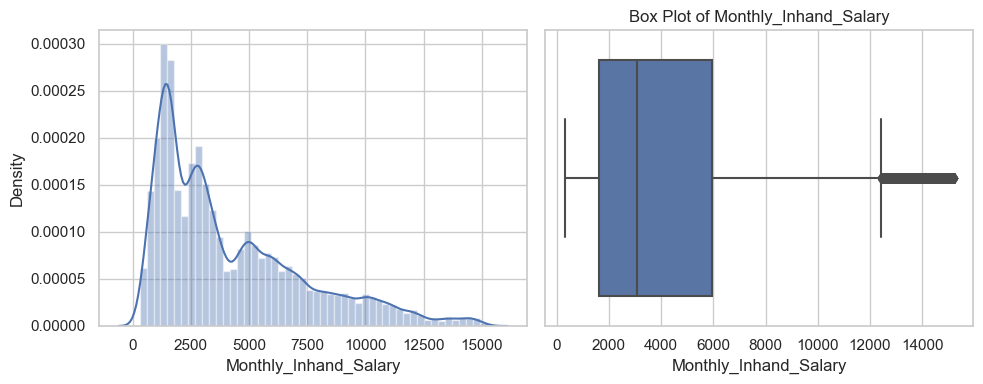

------------------------------------------------------------------------------------------------------------------------------------------------------

Number of missing value in Monthly_Inhand_Salary is 22500 and percentage of missing value 15.0%
--------------------------------------------------

IQR value for Monthly_Inhand_Salary is 4323.188762471116

Number of values below the lower value:0
Number of values above the higher value:2566


In [96]:
univariant_numerical(data,'Monthly_Inhand_Salary')

In [98]:
data[['Customer_ID','Monthly_Inhand_Salary']].head(10)

,Customer_ID,Monthly_Inhand_Salary
0,CUS_0xd40,1824.843333
1,CUS_0xd40,NaN
2,CUS_0xd40,NaN
3,CUS_0xd40,NaN
4,CUS_0xd40,1824.843333
5,CUS_0xd40,NaN
6,CUS_0xd40,1824.843333
7,CUS_0xd40,1824.843333
8,CUS_0x21b1,3037.986667
9,CUS_0x21b1,3037.986667


In [99]:
cust_id_mis = data.groupby('Customer_ID')['Monthly_Inhand_Salary'].agg(lambda x: x.value_counts().index[0]).to_dict()

data['Monthly_Inhand_Salary'] = data['Customer_ID'].map(cust_id_mis)

In [100]:
data[['Customer_ID','Monthly_Inhand_Salary']].head(10)

,Customer_ID,Monthly_Inhand_Salary
0,CUS_0xd40,1824.843333
1,CUS_0xd40,1824.843333
2,CUS_0xd40,1824.843333
3,CUS_0xd40,1824.843333
4,CUS_0xd40,1824.843333
5,CUS_0xd40,1824.843333
6,CUS_0xd40,1824.843333
7,CUS_0xd40,1824.843333
8,CUS_0x21b1,3037.986667
9,CUS_0x21b1,3037.986667


In [101]:
data['Type_of_Loan'].isnull().sum()

17112

In [102]:
data['Type_of_Loan'] = data['Type_of_Loan'].fillna('Not Specified')

In [103]:
data['Type_of_Loan'].isnull().sum()

0

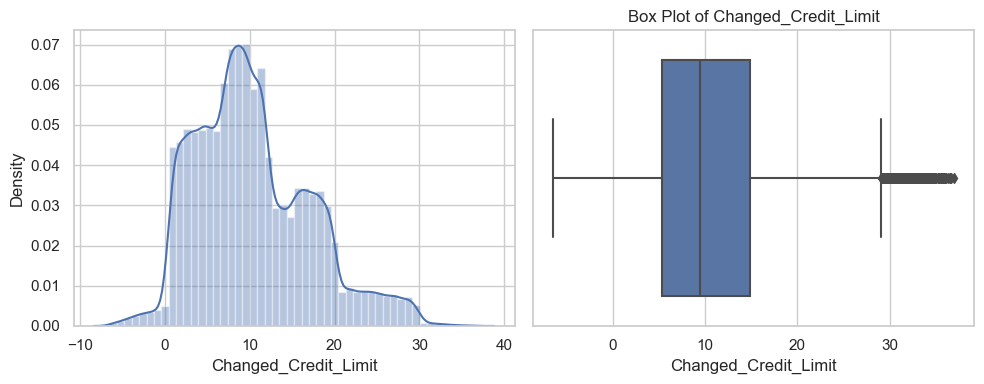

------------------------------------------------------------------------------------------------------------------------------------------------------

Number of missing value in Changed_Credit_Limit is 3150 and percentage of missing value 2.1%
--------------------------------------------------

IQR value for Changed_Credit_Limit is 9.51

Number of values below the lower value:0
Number of values above the higher value:1052


In [104]:
univariant_numerical(data,'Changed_Credit_Limit')

In [106]:
data[['Customer_ID','Changed_Credit_Limit']].head(20)

,Customer_ID,Changed_Credit_Limit
0,CUS_0xd40,11.270000
1,CUS_0xd40,11.270000
2,CUS_0xd40,NaN
3,CUS_0xd40,6.270000
4,CUS_0xd40,11.270000
5,CUS_0xd40,9.270000
6,CUS_0xd40,11.270000
7,CUS_0xd40,11.270000
8,CUS_0x21b1,5.420000
9,CUS_0x21b1,7.420000


In [107]:
data['Changed_Credit_Limit'] = data.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.ffill().bfill().interpolate())

In [108]:
data[['Customer_ID','Changed_Credit_Limit']].head(20)

,Customer_ID,Changed_Credit_Limit
0,CUS_0xd40,11.270000
1,CUS_0xd40,11.270000
2,CUS_0xd40,11.270000
3,CUS_0xd40,6.270000
4,CUS_0xd40,11.270000
5,CUS_0xd40,9.270000
6,CUS_0xd40,11.270000
7,CUS_0xd40,11.270000
8,CUS_0x21b1,5.420000
9,CUS_0x21b1,7.420000


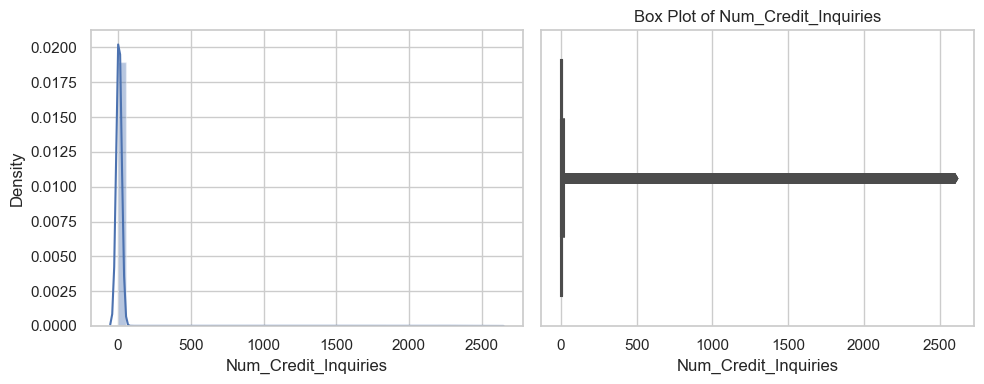

------------------------------------------------------------------------------------------------------------------------------------------------------

Number of missing value in Num_Credit_Inquiries is 3000 and percentage of missing value 2.0%
--------------------------------------------------

IQR value for Num_Credit_Inquiries is 6.0

Number of values below the lower value:0
Number of values above the higher value:2496


In [109]:
univariant_numerical(data,'Num_Credit_Inquiries')

In [111]:
cust_id_ci = data.groupby('Customer_ID')['Num_Credit_Inquiries'].agg(lambda x: x.value_counts().index[0]).to_dict()

data['Num_Credit_Inquiries'] = data['Customer_ID'].map(cust_id_ci)

In [112]:
data['Num_Credit_Inquiries'].isnull().sum()

0

In [113]:
data[['Customer_ID','Credit_Mix']].head(10)

,Customer_ID,Credit_Mix
0,CUS_0xd40,NaN
1,CUS_0xd40,Good
2,CUS_0xd40,Good
3,CUS_0xd40,Good
4,CUS_0xd40,Good
5,CUS_0xd40,Good
6,CUS_0xd40,Good
7,CUS_0xd40,Good
8,CUS_0x21b1,Good
9,CUS_0x21b1,Good


In [114]:
cust_id_cm = data.groupby('Customer_ID')['Credit_Mix'].agg(lambda x: x.value_counts().index[0]).to_dict()

data['Credit_Mix'] = data['Customer_ID'].map(cust_id_cm)

In [115]:
data[['Customer_ID','Credit_Mix']].head(10)

,Customer_ID,Credit_Mix
0,CUS_0xd40,Good
1,CUS_0xd40,Good
2,CUS_0xd40,Good
3,CUS_0xd40,Good
4,CUS_0xd40,Good
5,CUS_0xd40,Good
6,CUS_0xd40,Good
7,CUS_0xd40,Good
8,CUS_0x21b1,Good
9,CUS_0x21b1,Good


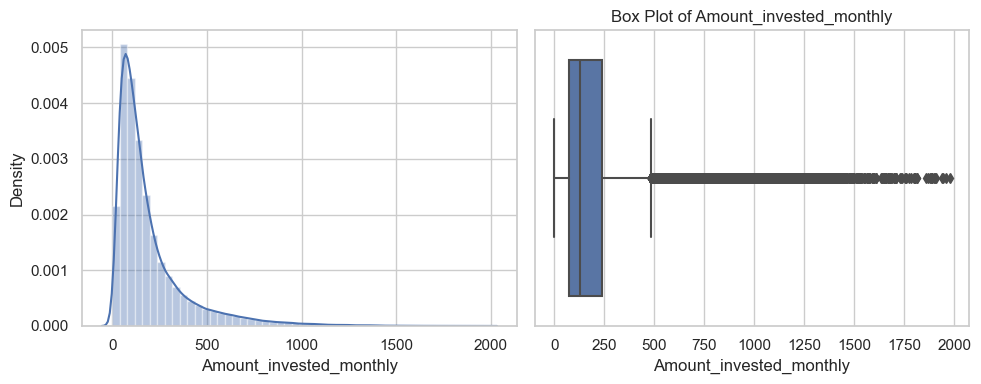

------------------------------------------------------------------------------------------------------------------------------------------------------

Number of missing value in Amount_invested_monthly is 13230 and percentage of missing value 8.82%
--------------------------------------------------

IQR value for Amount_invested_monthly is 164.61211016638407

Number of values below the lower value:0
Number of values above the higher value:11355


In [116]:
univariant_numerical(data,'Amount_invested_monthly')

In [118]:
data['Amount_invested_monthly'].isnull().sum()

13230

In [119]:
cust_id_aim = data.groupby('Customer_ID')['Amount_invested_monthly'].median().to_dict()

data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna(data['Customer_ID'].map(cust_id_aim))

In [120]:
data['Amount_invested_monthly'].isnull().sum()

0

In [121]:
data['Amount_invested_monthly'].dtype

dtype('float64')

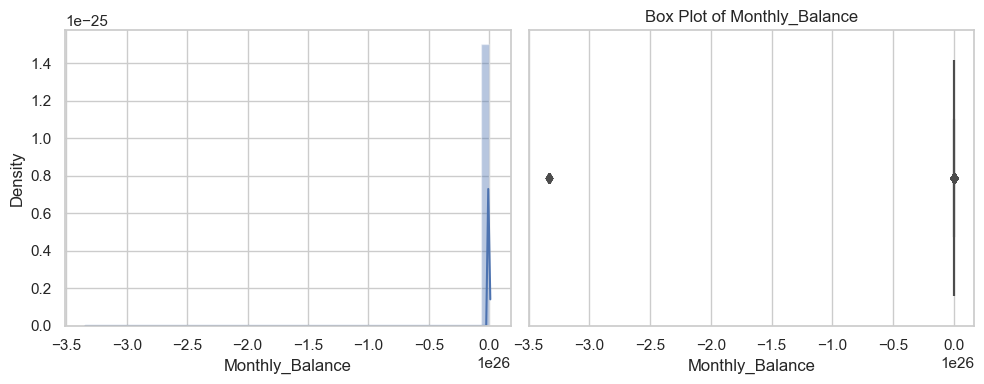

------------------------------------------------------------------------------------------------------------------------------------------------------

Number of missing value in Monthly_Balance is 3430 and percentage of missing value 2.29%
--------------------------------------------------

IQR value for Monthly_Balance is 199.94155020066086

Number of values below the lower value:15
Number of values above the higher value:11352


In [122]:
univariant_numerical(data,'Monthly_Balance')

In [123]:
data['Monthly_Balance'].isnull().sum()

3430

In [124]:
cust_id_mb = data.groupby('Customer_ID')['Monthly_Balance'].median().to_dict()

data['Monthly_Balance'] = data['Monthly_Balance'].fillna(data['Customer_ID'].map(cust_id_mb))

In [125]:
data['Monthly_Balance'].isnull().sum()

0

In [126]:
min_value = data['Monthly_Balance'].min()
min_value

-3.333333333333333e+26

In [127]:
data.loc[data['Monthly_Balance'] == min_value, 'Monthly_Balance'] = data['Customer_ID'].map(cust_id_mb)

In [128]:
data['Monthly_Balance'].min()

0.007759664775335295

In [ ]:
univariant_numerical(data,'Monthly_Balance')

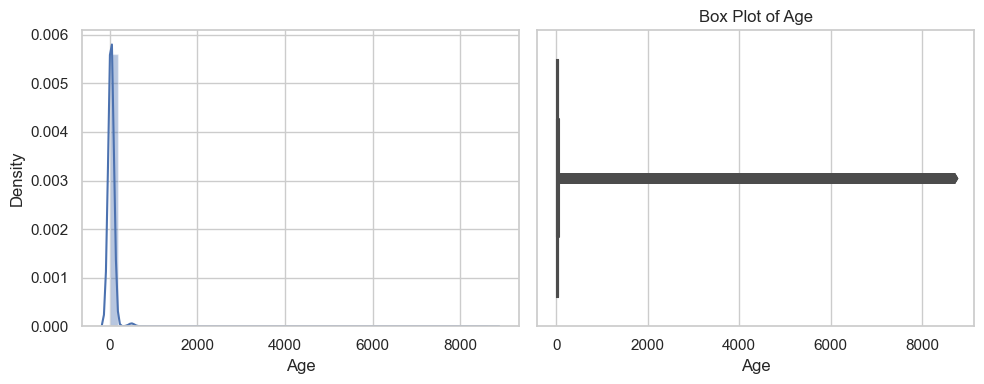

------------------------------------------------------------------------------------------------------------------------------------------------------

Number of missing value in Age is 0 and percentage of missing value 0.0%
--------------------------------------------------

IQR value for Age is 18.0

Number of values below the lower value:0
Number of values above the higher value:4184


In [129]:
univariant_numerical(data,'Age')

In [133]:
median_age = data['Age'].median()
data['Age'] = data['Age'].apply(lambda x: median_age if x>80 or x<18 else x)

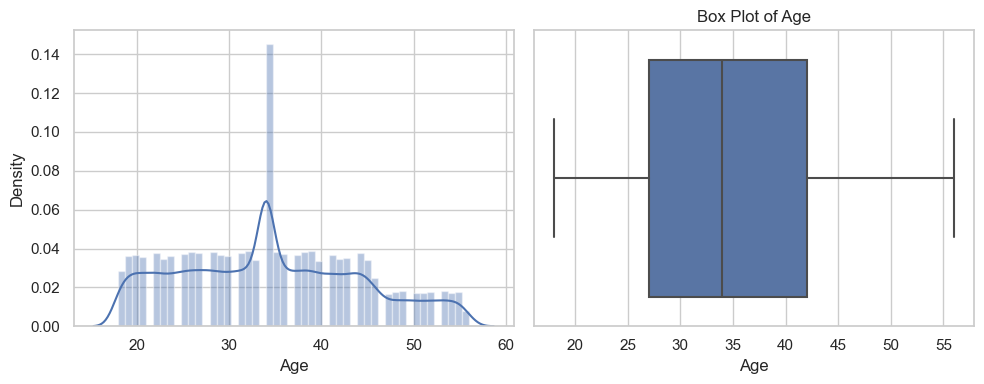

------------------------------------------------------------------------------------------------------------------------------------------------------

Number of missing value in Age is 0 and percentage of missing value 0.0%
--------------------------------------------------

IQR value for Age is 15.0

Number of values below the lower value:0
Number of values above the higher value:0


In [135]:
univariant_numerical(data,'Age')

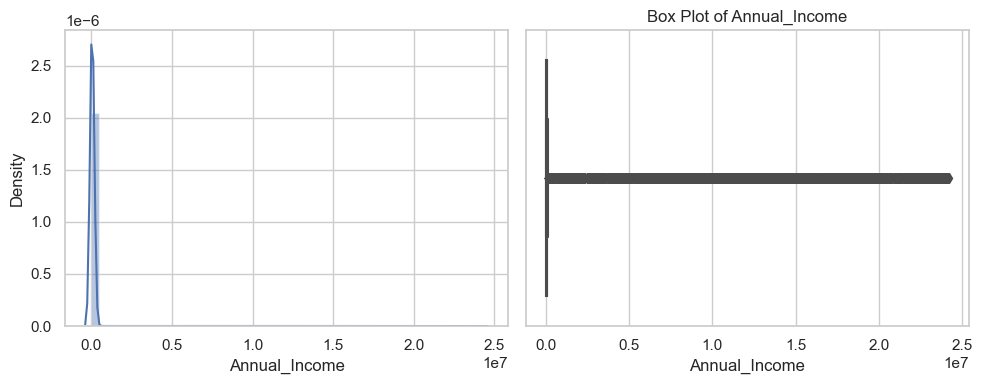

------------------------------------------------------------------------------------------------------------------------------------------------------

Number of missing value in Annual_Income is 0 and percentage of missing value 0.0%
--------------------------------------------------

IQR value for Annual_Income is 53341.41499999999

Number of values below the lower value:0
Number of values above the higher value:4165


In [137]:
univariant_numerical(data,'Annual_Income')

In [139]:
data['Annual_Income'].describe()

count     150000.000000
mean      173055.202531
std      1404214.602713
min         7005.930000
25%        19455.490000
50%        37578.610000
75%        72796.905000
max     24198062.000000
Name: Annual_Income, dtype: float64

In [140]:
Q1 = data['Annual_Income'].quantile(.25)
Q3 = data['Annual_Income'].quantile(.75)
IQR = Q3 - Q1
IQR

53341.41499999999

In [141]:
IQR_min = Q1 - 1.5*IQR
IQR_min

-60556.63249999999

In [142]:
IQR_max = Q3 + 1.5*IQR
IQR_max

152809.0275

In [143]:
data[data['Annual_Income']>IQR_max]['Customer_ID'].nunique()

1624

In [144]:
cust = data[data['Annual_Income']>IQR_max]['Customer_ID'].unique()
cust

array(['CUS_0x284a', 'CUS_0xbffe', 'CUS_0x9a71', ..., 'CUS_0x41d3',
       'CUS_0x7a7d', 'CUS_0x90a1'], dtype=object)

In [145]:
cust_id_ai = data[data['Customer_ID'].isin(cust)].groupby('Customer_ID')['Annual_Income'].median().to_dict()

data['Annual_Income'] = data['Customer_ID'].map(cust_id_ai).fillna(data['Annual_Income']) 

In [156]:
data['Annual_Income'] = data['Annual_Income'].astype('float')

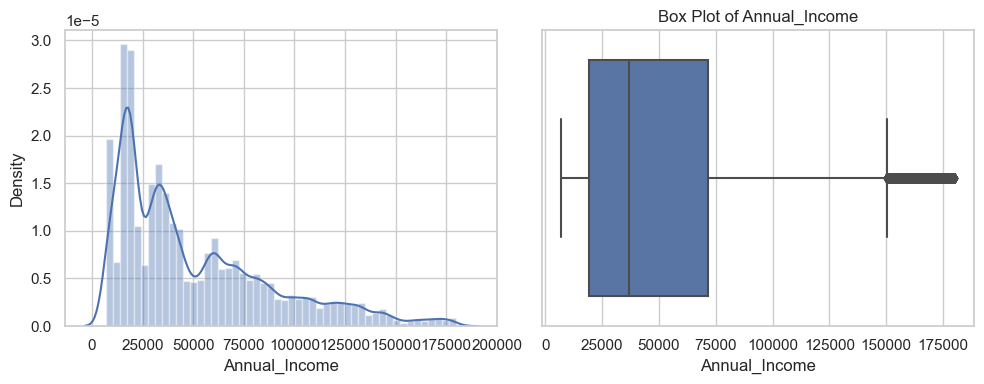

------------------------------------------------------------------------------------------------------------------------------------------------------

Number of missing value in Annual_Income is 0 and percentage of missing value 0.0%
--------------------------------------------------

IQR value for Annual_Income is 52340.4975

Number of values below the lower value:0
Number of values above the higher value:3000


In [166]:
univariant_numerical(data,'Annual_Income')

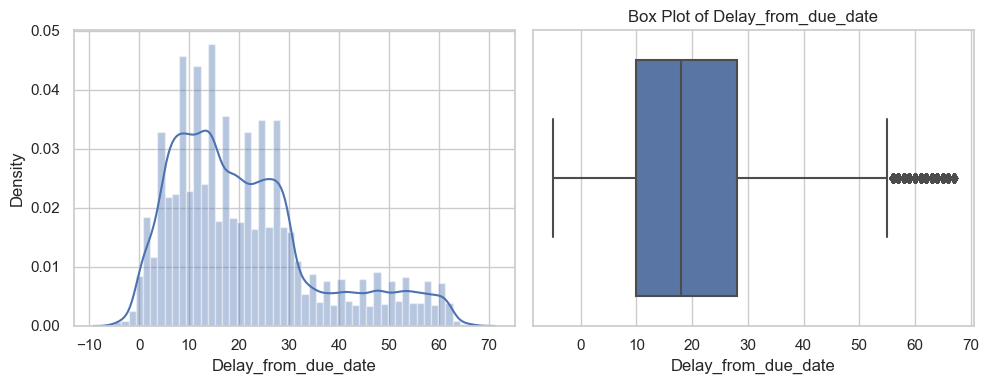

------------------------------------------------------------------------------------------------------------------------------------------------------

Number of missing value in Delay_from_due_date is 0 and percentage of missing value 0.0%
--------------------------------------------------

IQR value for Delay_from_due_date is 18.0

Number of values below the lower value:0
Number of values above the higher value:5998


In [168]:
univariant_numerical(data,'Delay_from_due_date')

In [170]:
data[data['Delay_from_due_date']<0].shape[0]

889

In [171]:
cust = data[data['Delay_from_due_date']<0]['Customer_ID'].unique()

In [172]:
cust_id_delay = data[data['Customer_ID'].isin(cust)].groupby('Customer_ID')['Delay_from_due_date'].median().to_dict()

data['Delay_from_due_date'] = data['Customer_ID'].map(cust_id_delay).fillna(data['Delay_from_due_date']) 

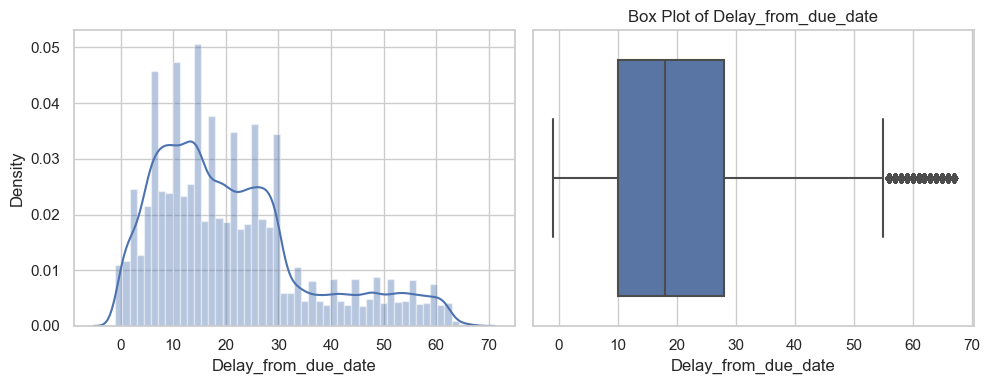

------------------------------------------------------------------------------------------------------------------------------------------------------

Number of missing value in Delay_from_due_date is 0 and percentage of missing value 0.0%
--------------------------------------------------

IQR value for Delay_from_due_date is 18.0

Number of values below the lower value:0
Number of values above the higher value:5998


In [173]:
univariant_numerical(data,'Delay_from_due_date')

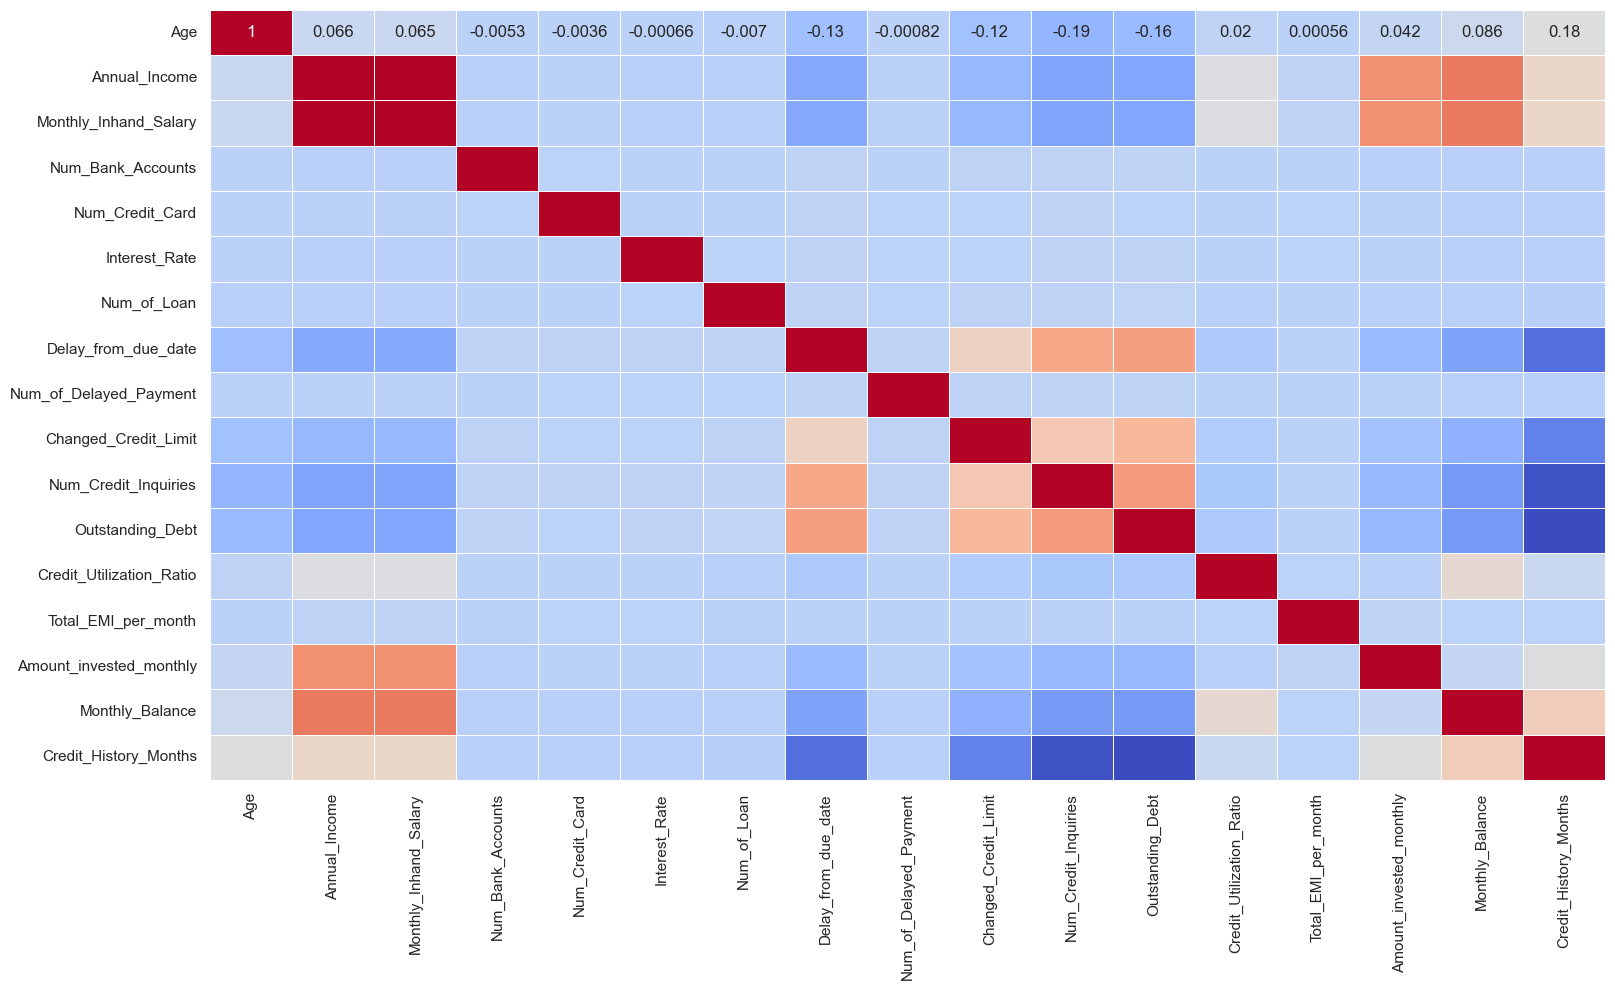

In [175]:
# Correlation 
corr = data.corr(numeric_only=True)
plt.figure(figsize=(18,10))
sns.heatmap(data=corr,annot=True,cmap='coolwarm',linewidths=0.5,cbar=False)
plt.show()

In [176]:
# Categorical Analysis 
def univariant_catrgorical(data,col,n):
    print(f'Analysis for {col}')
    plt.figure(figsize=(15,7))
    table = data[col].value_counts().head(n)
    colors = sns.color_palette('viridis', len(table))

    null_value = data[col].isnull().sum()
    percent = ((data[col].isnull().sum()/data[col].isnull().count())*100).round(2)
    print(f'\nNumber of missing value in {col} is {null_value} and percentage of missing value {percent}%')
    print('-' * 50)

    unique_value = data[col].unique()
    print(f'\nUnique value in {col} is {unique_value}')
    print('-' * 50)

    number_unique_value = data[col].nunique()
    print(f'\nNumber of unique value in {col} is {number_unique_value}')
    print('-' * 50)

    print(f'\nTop 15 Value counts for {col}:\n{table}\n')
    print('-' * 150)
    
    plt.subplot(1,2,1)
    plt.pie(table,labels=table.index,autopct='%.2f%%',startangle=90,colors=colors)
    plt.title(f'Distribution for {col} ')
    
    plt.subplot(1,2,2)
    sns.barplot(x=table.index, y=table.values,palette=colors)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    

Analysis for Credit_Score

Number of missing value in Credit_Score is 50000 and percentage of missing value 33.33%
--------------------------------------------------

Unique value in Credit_Score is ['Good' 'Standard' 'Poor' nan]
--------------------------------------------------

Number of unique value in Credit_Score is 3
--------------------------------------------------

Top 15 Value counts for Credit_Score:
Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------------------------------------


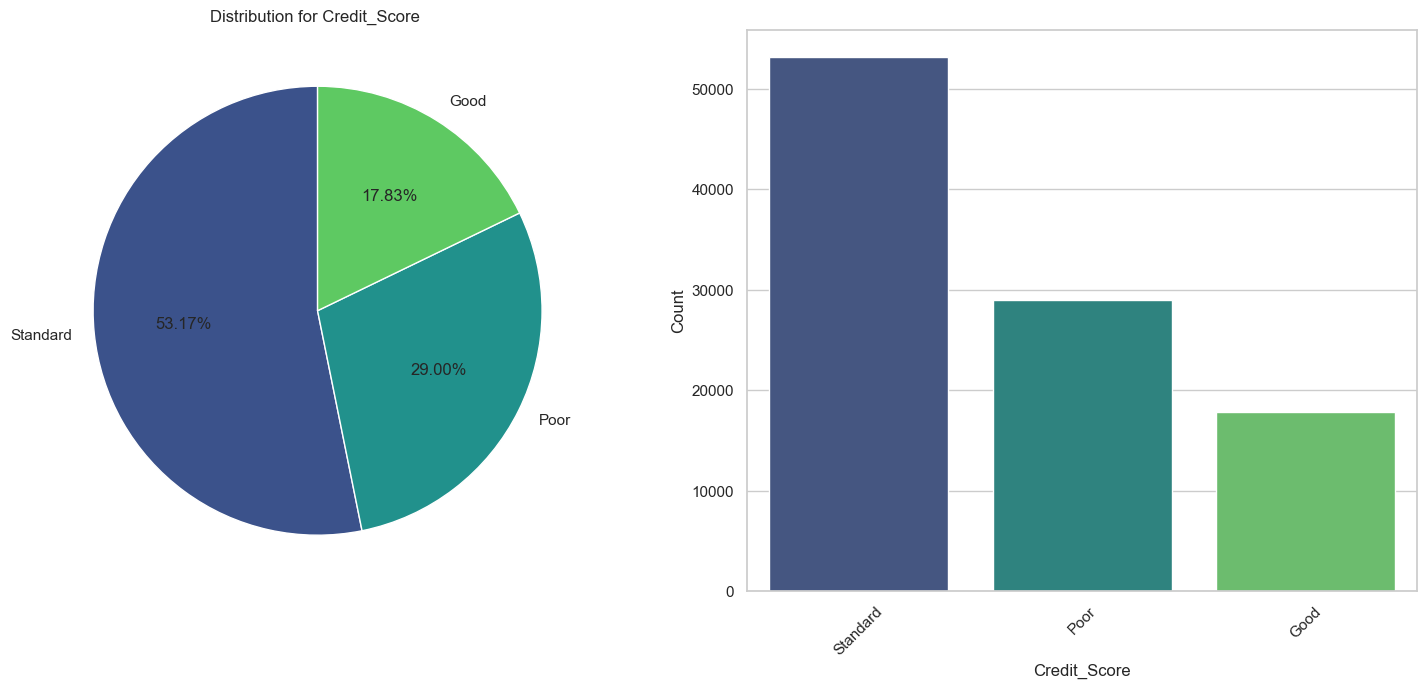

In [177]:
univariant_catrgorical(data,'Credit_Score',n=15)

Analysis for Payment_Behaviour

Number of missing value in Payment_Behaviour is 0 and percentage of missing value 0.0%
--------------------------------------------------

Unique value in Payment_Behaviour is ['High_spent_Medium_value_payments' 'High_spent_Large_value_payments'
 'High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Small_value_payments' 'Low_spent_Medium_value_payments']
--------------------------------------------------

Number of unique value in Payment_Behaviour is 6
--------------------------------------------------

Top 15 Value counts for Payment_Behaviour:
Payment_Behaviour
Low_spent_Small_value_payments      61776
High_spent_Medium_value_payments    33828
High_spent_Large_value_payments     23616
Low_spent_Medium_value_payments     13956
High_spent_Small_value_payments      9180
Low_spent_Large_value_payments       7644
Name: count, dtype: int64

--------------------------------------------------------------------------------------------

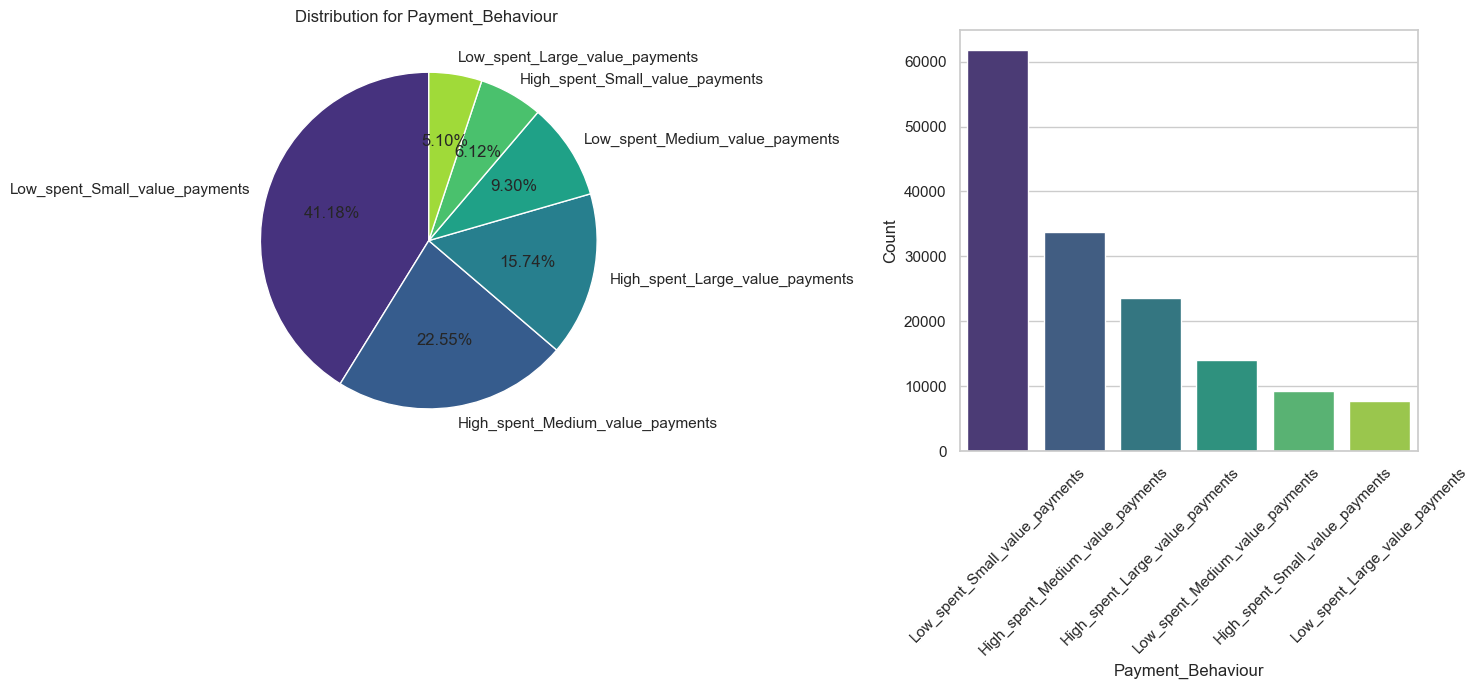

In [179]:
univariant_catrgorical(data,'Payment_Behaviour',n=15)

Analysis for Payment_of_Min_Amount

Number of missing value in Payment_of_Min_Amount is 0 and percentage of missing value 0.0%
--------------------------------------------------

Unique value in Payment_of_Min_Amount is ['No' 'Yes']
--------------------------------------------------

Number of unique value in Payment_of_Min_Amount is 2
--------------------------------------------------

Top 15 Value counts for Payment_of_Min_Amount:
Payment_of_Min_Amount
Yes    78484
No     71516
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------------------------------------


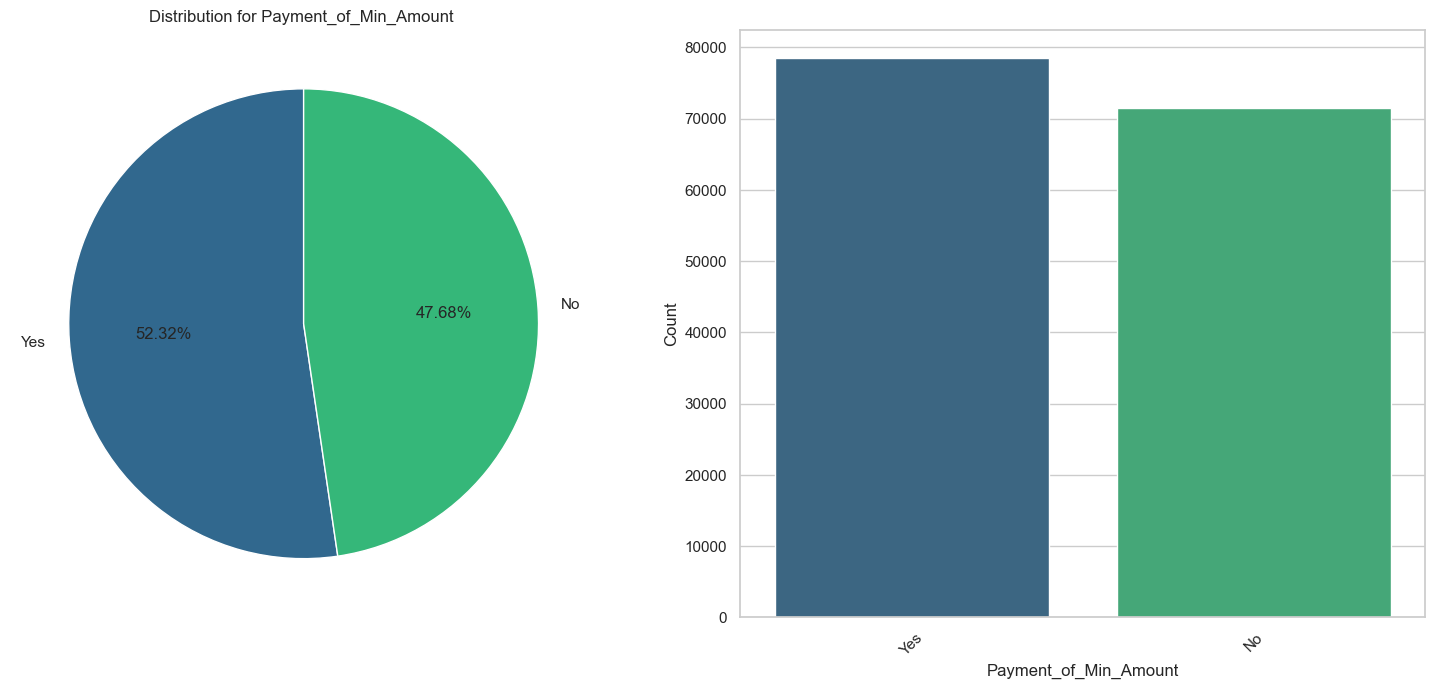

In [180]:
univariant_catrgorical(data,'Payment_of_Min_Amount',n=15)

Analysis for Occupation

Number of missing value in Occupation is 0 and percentage of missing value 0.0%
--------------------------------------------------

Unique value in Occupation is ['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect' 'Unkown']
--------------------------------------------------

Number of unique value in Occupation is 16
--------------------------------------------------

Top 15 Value counts for Occupation:
Occupation
Lawyer           10644
Engineer         10296
Architect        10236
Mechanic         10164
Scientist        10116
Accountant       10116
Developer        10080
Media_Manager    10068
Teacher          10008
Entrepreneur      9972
Doctor            9852
Journalist        9804
Manager           9648
Musician          9528
Writer            9456
Name: count, dtype: int64

-------------------------------------------------------------

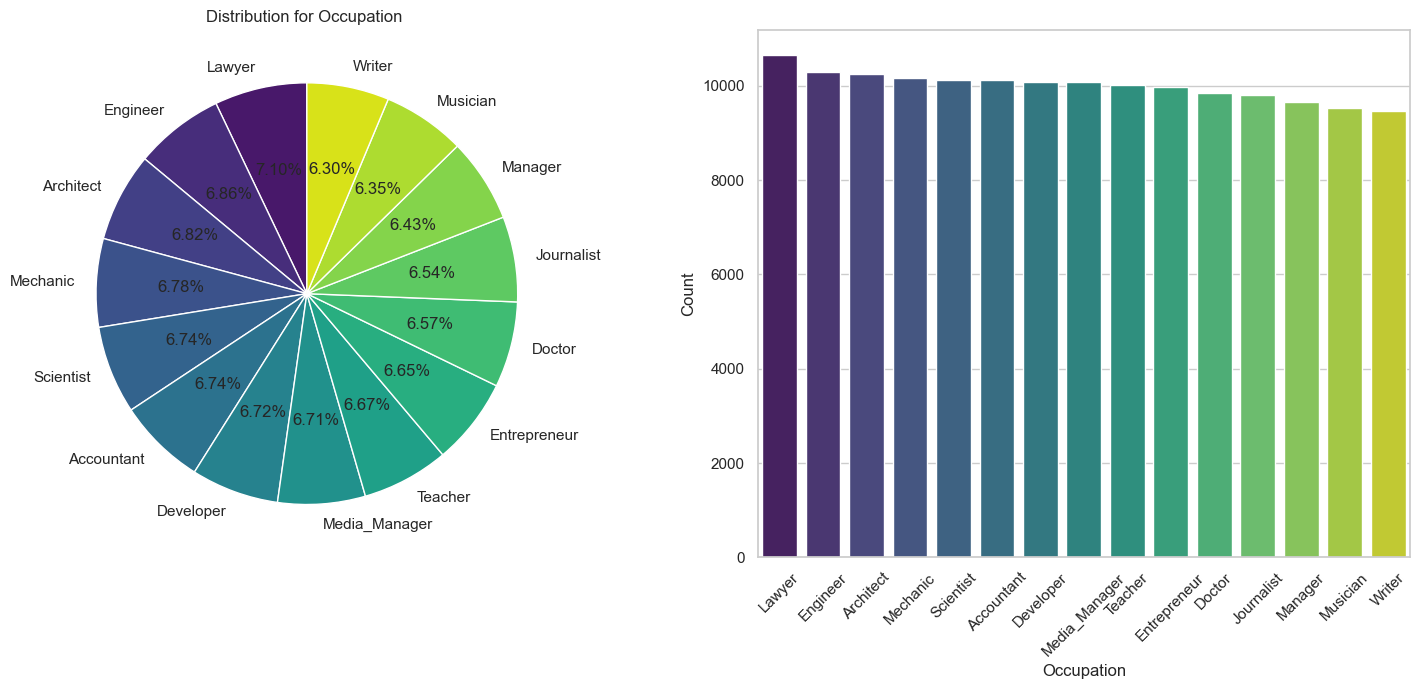

In [181]:
univariant_catrgorical(data,'Occupation',n=15)

### Multivarient Analysis with target variables 

In [184]:
data['Credit_Score'] = data['Credit_Score'].astype('category')

In [185]:
numerical_colmun

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Months'],
      dtype='object')

In [186]:
pair_plot = data[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Months','Credit_Score']][:20000]
pair_plot.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Months,Credit_Score
0,23.000000,19114.120000,1824.843333,3,4,3,4,3.000000,7,11.270000,4.000000,809.980000,26.822620,49.574949,80.415295,312.494089,265,Good
1,23.000000,19114.120000,1824.843333,3,4,3,4,3.000000,7,11.270000,4.000000,809.980000,31.944960,49.574949,118.280222,284.629162,266,Good
2,34.000000,19114.120000,1824.843333,3,4,3,4,3.000000,7,11.270000,4.000000,809.980000,28.609352,49.574949,81.699521,331.209863,267,Good
3,23.000000,19114.120000,1824.843333,3,4,3,4,3.000000,4,6.270000,4.000000,809.980000,31.377862,49.574949,199.458074,223.451310,268,Good
4,23.000000,19114.120000,1824.843333,3,4,3,4,3.000000,4,11.270000,4.000000,809.980000,24.797347,49.574949,41.420153,341.489231,269,Good


In [187]:
#plt.figure(figsize=(25,20))
#sns.pairplot(pair_plot,hue='Credit_Score',diag_kind='kde',height=2, aspect=1.5)

In [188]:
#plt.figure(figsize=(20, 20))  
#pairplot = sns.pairplot(data, hue='Credit_Score', height=2, aspect=1.5, diag_kind="kde")

#pairplot.fig.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95)  # Adjust layout
#plt.show()

In [189]:
avg_num_loan = data.groupby('Credit_Score')['Num_of_Loan'].agg('mean').reset_index()
avg_num_loan

,Credit_Score,Num_of_Loan
0,Good,10.183924
1,Poor,11.385061
2,Standard,10.615959


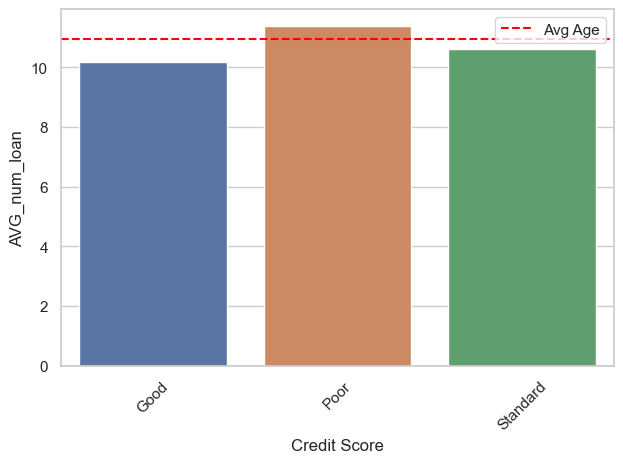

In [190]:
sns.barplot(x=avg_num_loan['Credit_Score'],y=avg_num_loan['Num_of_Loan'])
plt.xlabel('Credit Score')
plt.ylabel('AVG_num_loan')
mean_loan = data['Num_of_Loan'].mean()
plt.axhline(y=mean_loan, linestyle='--', color='red', label='Avg Age')
plt.xticks(rotation=45)
plt.legend() 
plt.tight_layout()
plt.show()

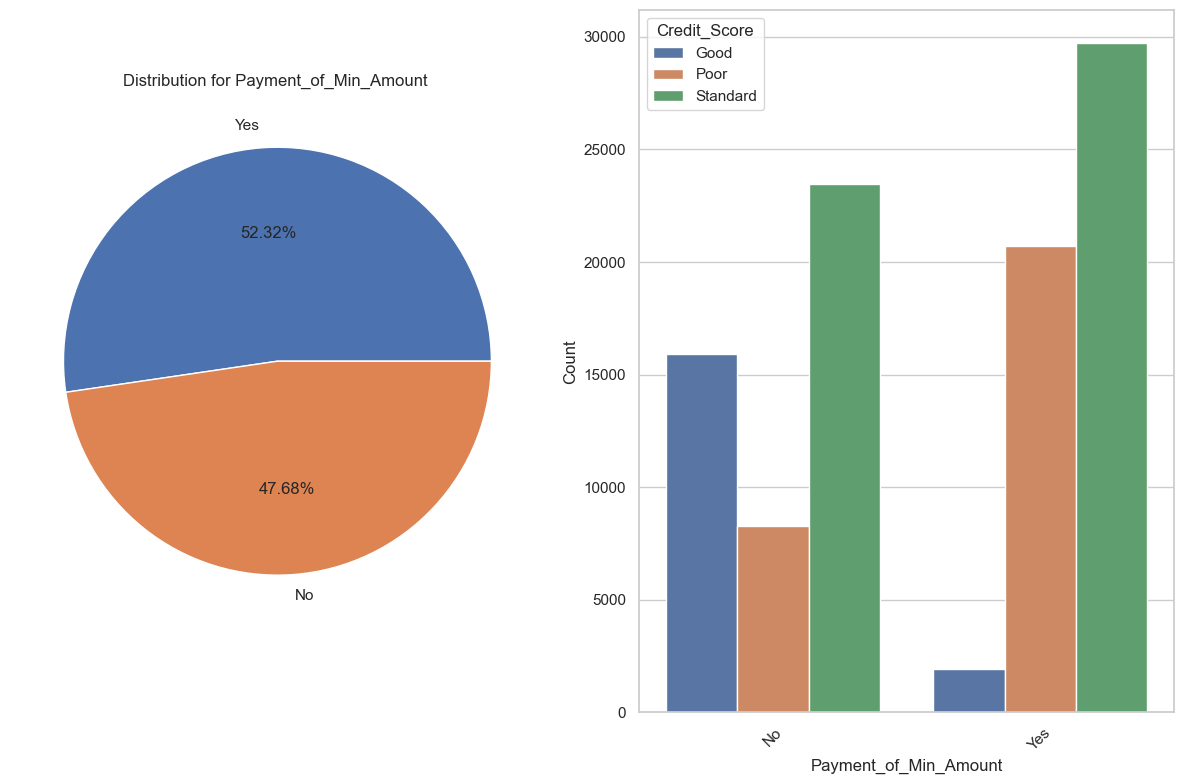

In [191]:
# payment min amount and target variable 

plt.figure(figsize=(12,8))
table = data['Payment_of_Min_Amount'].value_counts()
plt.subplot(1,2,1)
plt.pie(table,labels=table.index,autopct='%.2f%%')
plt.title('Distribution for Payment_of_Min_Amount ')
plt.subplot(1,2,2)
sns.countplot(x=data['Payment_of_Min_Amount'],hue=data['Credit_Score'])
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

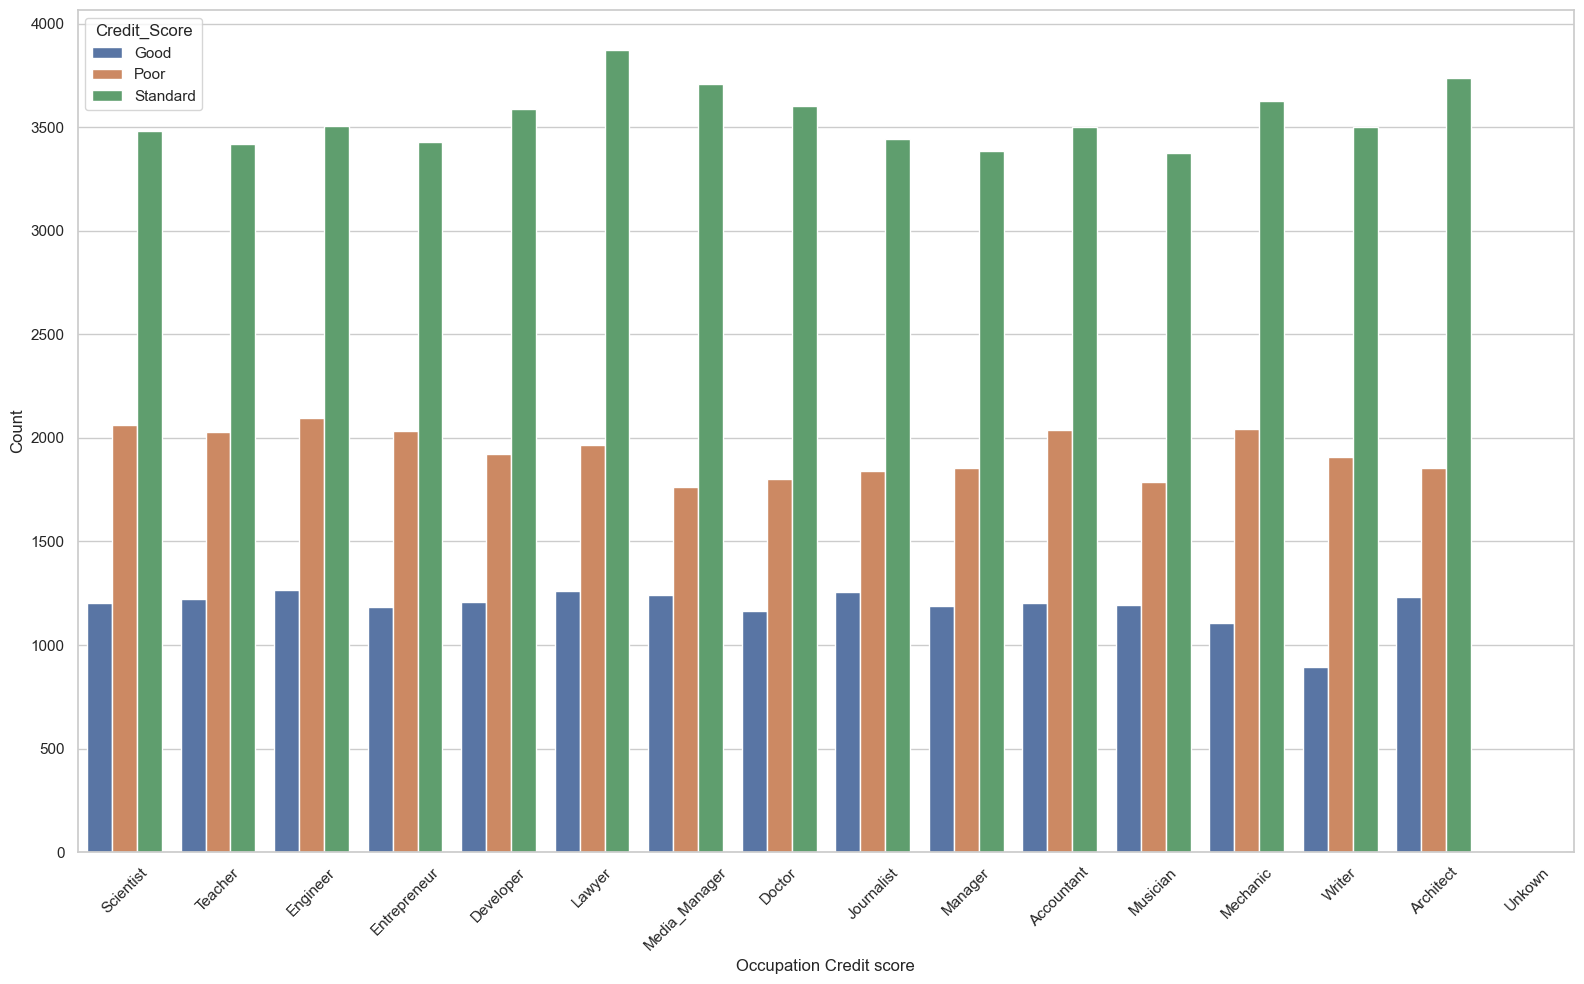

In [192]:
# payment min amount and target variable 

plt.figure(figsize=(16,10))
sns.countplot(x=data['Occupation'],hue=data['Credit_Score'])
plt.xlabel('Occupation Credit score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

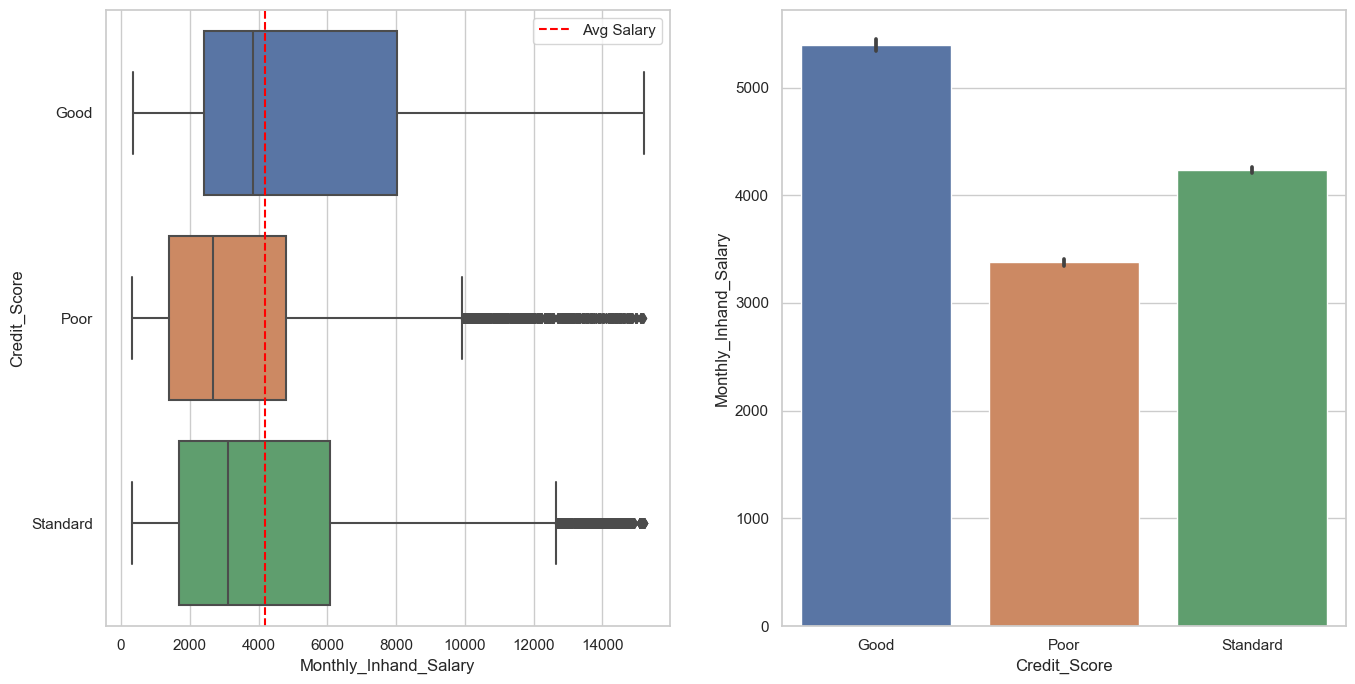

In [193]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x = data['Monthly_Inhand_Salary'],y = data['Credit_Score'])
mean_salary = data['Monthly_Inhand_Salary'].mean()
plt.axvline(x=mean_salary, linestyle='--', color='red', label='Avg Salary')
plt.legend() 
plt.subplot(1,2,2)
sns.barplot(y=data['Monthly_Inhand_Salary'],x=data['Credit_Score'])
plt.show()

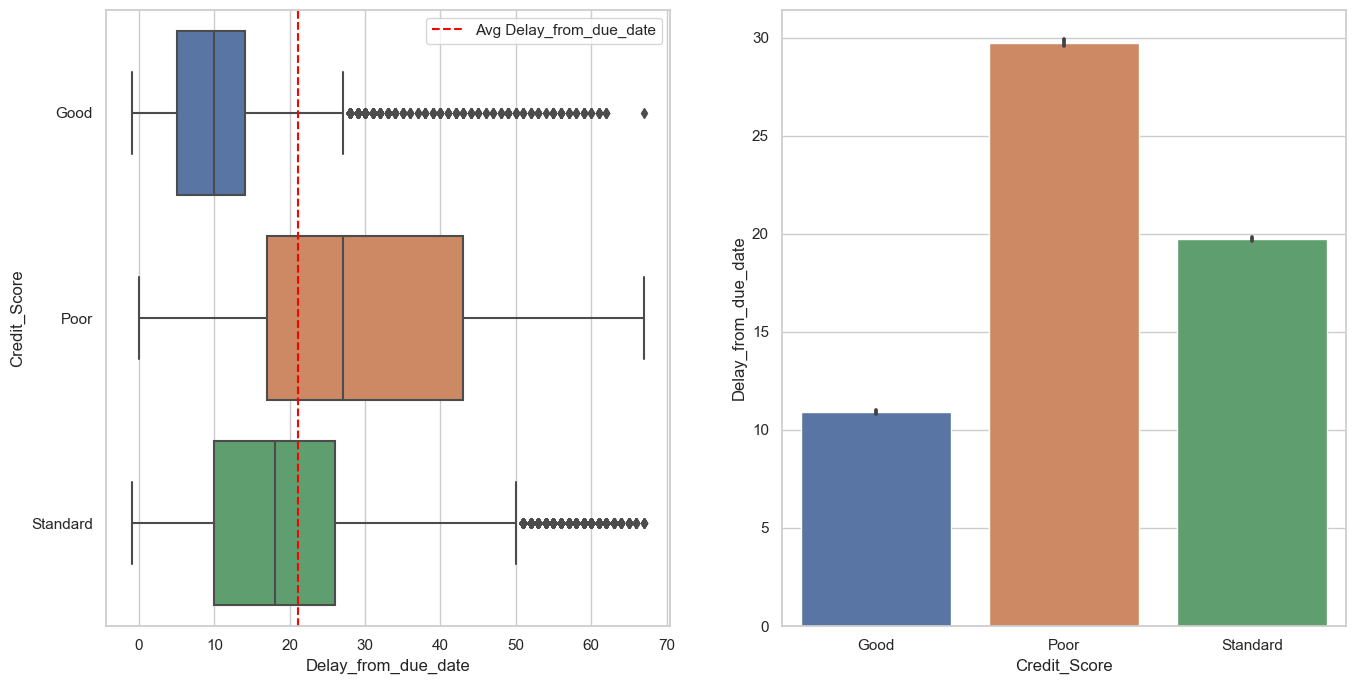

In [194]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x = data['Delay_from_due_date'],y = data['Credit_Score'])
mean_delay_from_due_date = data['Delay_from_due_date'].mean()
plt.axvline(x=mean_delay_from_due_date, linestyle='--', color='red', label='Avg Delay_from_due_date')
plt.legend() 
plt.subplot(1,2,2)
sns.barplot(y=data['Delay_from_due_date'],x=data['Credit_Score']) 
plt.show()

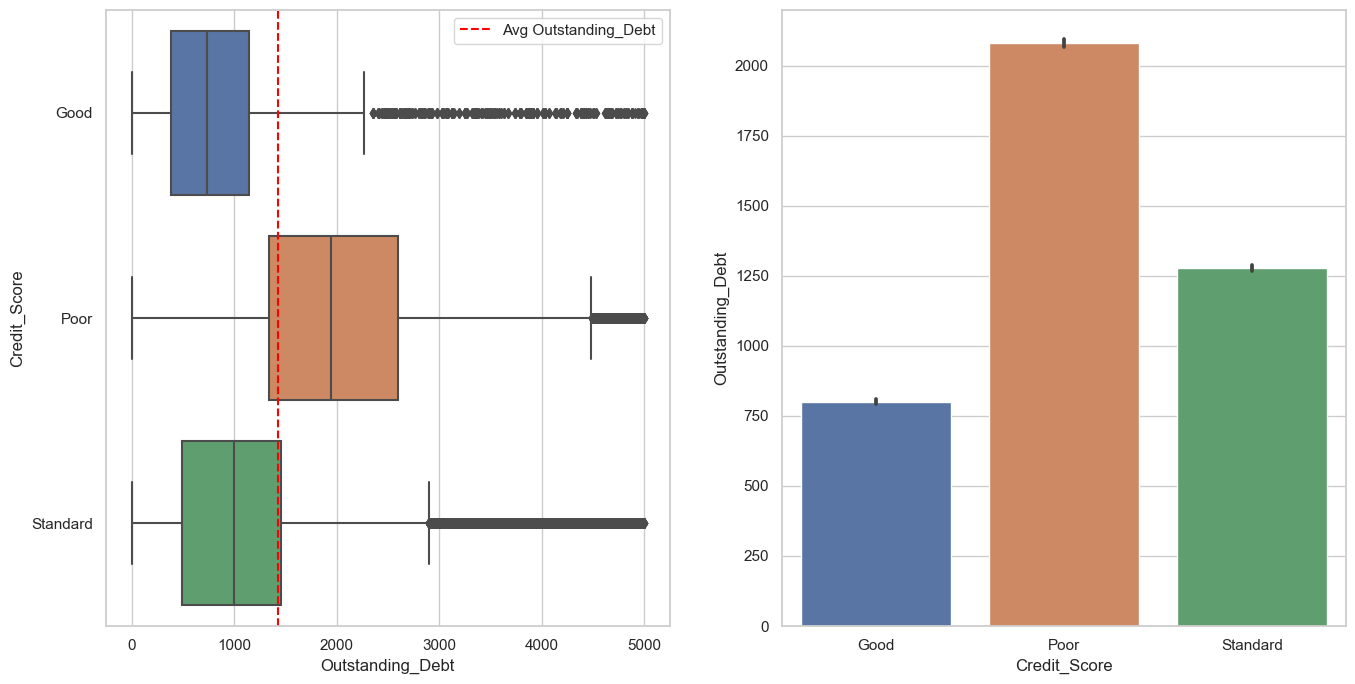

In [195]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x = data['Outstanding_Debt'],y = data['Credit_Score'])
mean_outstanding_Debt = data['Outstanding_Debt'].mean()
plt.axvline(x=mean_outstanding_Debt, linestyle='--', color='red', label='Avg Outstanding_Debt')
plt.legend() 
plt.subplot(1,2,2)
sns.barplot(y=data['Outstanding_Debt'],x=data['Credit_Score']) 
plt.show()

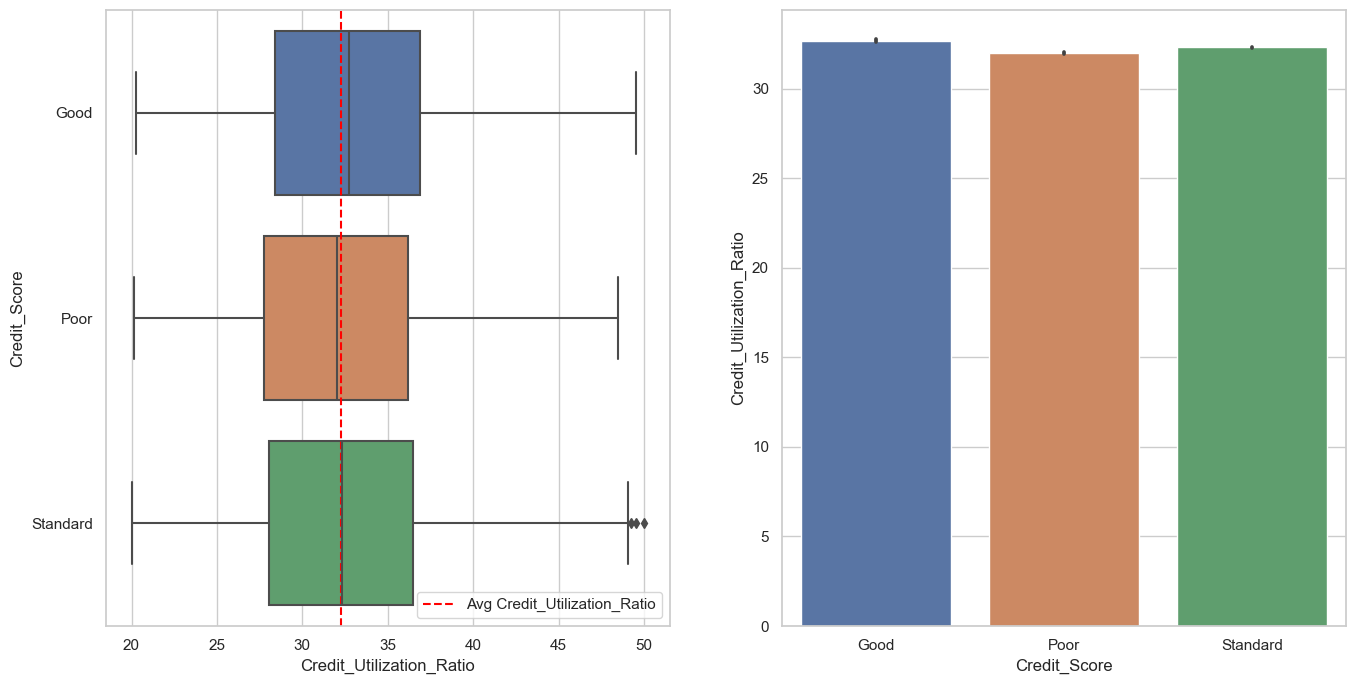

In [196]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x = data['Credit_Utilization_Ratio'],y = data['Credit_Score'])
mean_Credit_Utilization_Ratio = data['Credit_Utilization_Ratio'].mean()
plt.axvline(x=mean_Credit_Utilization_Ratio, linestyle='--', color='red', label='Avg Credit_Utilization_Ratio')
plt.legend()
plt.subplot(1,2,2)
sns.barplot(y=data['Credit_Utilization_Ratio'],x=data['Credit_Score'])
plt.show()

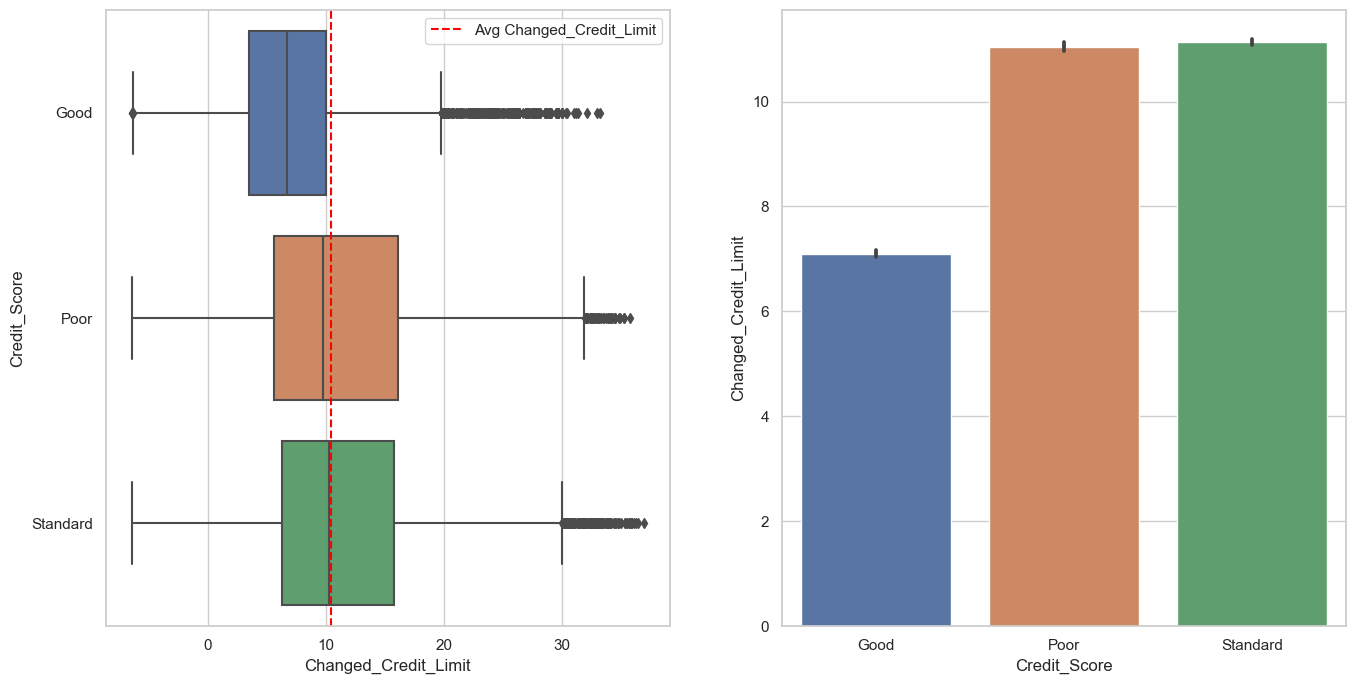

In [197]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x = data['Changed_Credit_Limit'],y = data['Credit_Score'])
mean_Changed_Credit_Limit = data['Changed_Credit_Limit'].mean()
plt.axvline(x=mean_Changed_Credit_Limit, linestyle='--', color='red', label='Avg Changed_Credit_Limit')
plt.legend()
plt.subplot(1,2,2)
sns.barplot(y=data['Changed_Credit_Limit'],x=data['Credit_Score'])
plt.show()

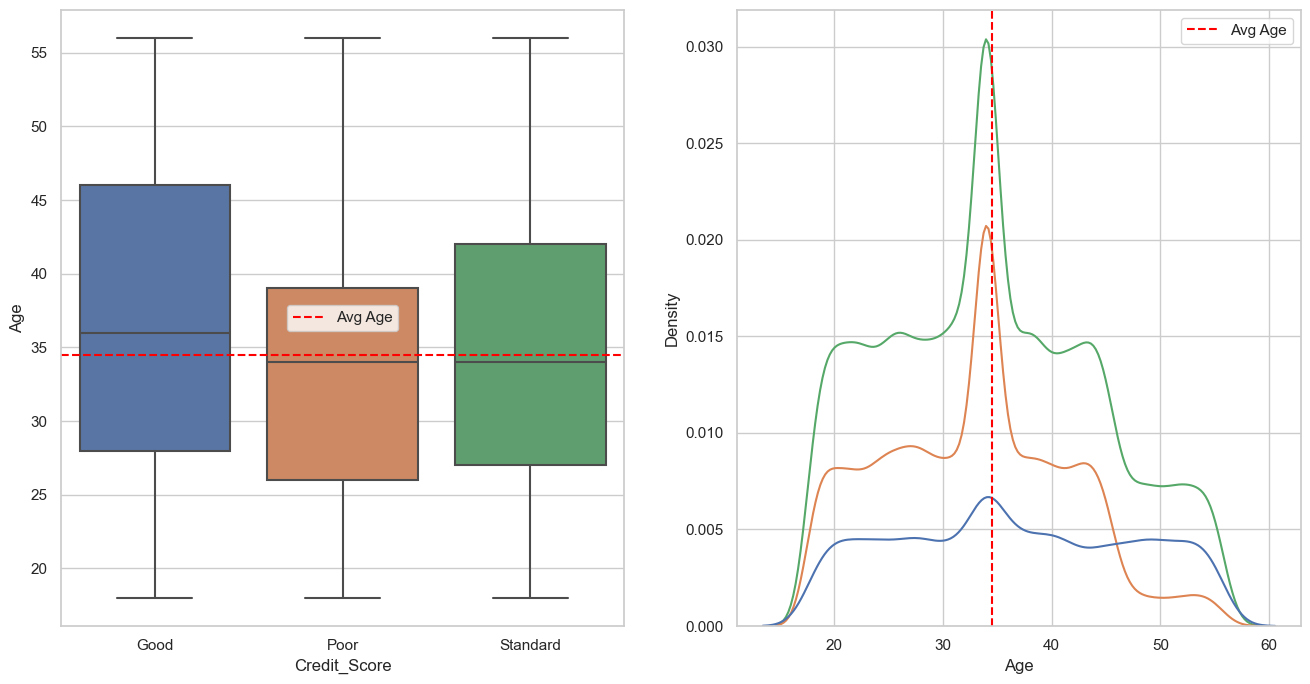

In [198]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Credit_Score'], y=data['Age']) 
mean_age = data['Age'].mean()
plt.axhline(y=mean_age, linestyle='--', color='red', label='Avg Age')
plt.legend()
plt.subplot(1, 2, 2)
sns.kdeplot(x=data['Age'], hue=data['Credit_Score'])
plt.axvline(x=mean_age, linestyle='--', color='red', label='Avg Age')
plt.legend()
plt.show()


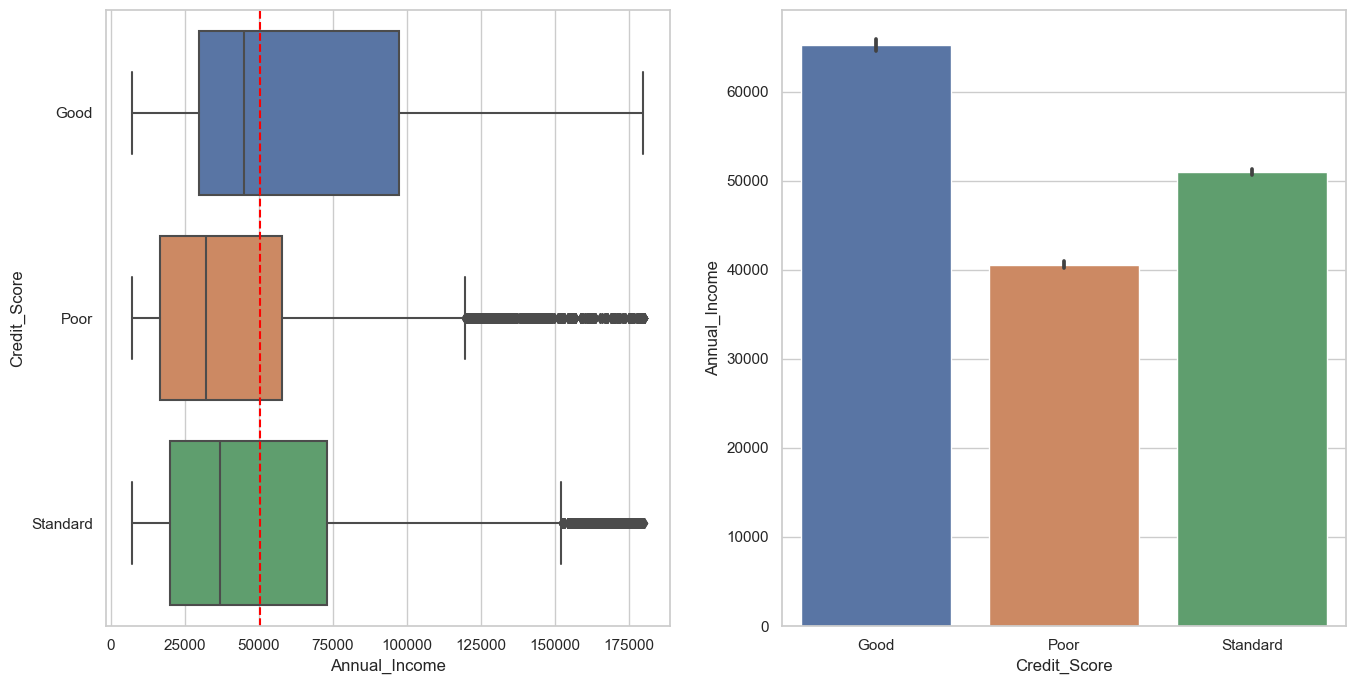

In [199]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x = data['Annual_Income'],y = data['Credit_Score'])
mean_Annual_Income = data['Annual_Income'].mean()
plt.axvline(x=mean_Annual_Income, linestyle='--', color='red', label='Avg Annual_Income')
plt.subplot(1,2,2)
sns.barplot(y=data['Annual_Income'],x=data['Credit_Score'])
plt.show()

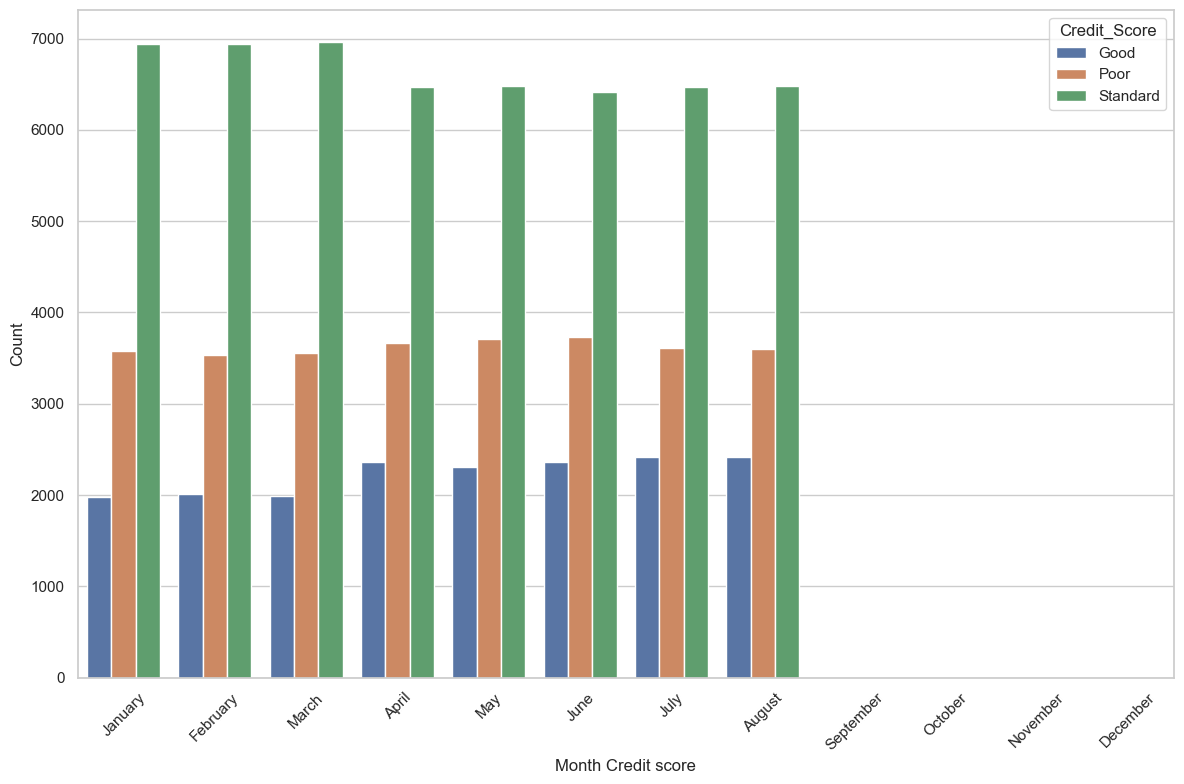

In [200]:
plt.figure(figsize=(12,8))
table = data['Month'].value_counts()
sns.countplot(x=data['Month'],hue=data['Credit_Score'])
plt.xlabel('Month Credit score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Train and Test split for statistical analysis 

In [202]:
train = data[0:100000]
train.shape

(100000, 28)

In [203]:
train['Credit_Score'].value_counts().sum()

100000

In [204]:
test = data[100000:150000].drop('Credit_Score', axis=1)
test.shape

(50000, 27)

### Statistical Analysis 

In [206]:
def ANOVA_relation_test_all(data,categorical_column,numerical_column,alpha):
    for numerical_column in numerical_column:
        print("\n" + "="*50)
        print(f"Performing ANOVA for {numerical_column}")
        print("="*50)
        
        # Grouped data
        grouped_data = data.groupby(by=categorical_column,observed=True)[numerical_column].apply(list)
        grouped_data
    
        ## Check for assumption
        print('Alpha:',alpha)
        # Normality Test (Jarque Bera test)
        print('\nNormality_test:Jarque Bera test')
        w,p_value_n = stats.jarque_bera(data[numerical_column])
        print('Jarque_bera_p_value:',p_value_n)
    
        # Variance test (Levene test)
        print('\nVariance_test:Levene test')
        levene,p_value_v = stats.levene(*grouped_data)
        print('levene_p_value:',p_value_v)
    
        # select correct ANOVA test 
        if p_value_n > alpha:
            print('\nFollows the normal distribution')
            if p_value_v > alpha:
                print('Variance are significantly different - Perform one way ANOVA test')
                test_stat , p_value_anova = stats.f_oneway(*grouped_data)
                print('ANOVA_p_value:',p_value_anova)
                if p_value_anova < alpha :
                    print('\nReject the null hypothesis: There is an enough statistical evidence there is significant differnece in mean')
                    print('Pefrom Tukey HSD Test')
                    tukey = pairwise_tukeyhsd(endog=data[numerical_column],groups=data[categorical_column],alpha=alpha)
                    print('\n',tukey)
                else:
                    print('\nFail to reject the null hypothesis: All the means are same ')
                
            else:
                print('\nThere no differnece in variance - Perform Welch t independent test')
                t_test_stat,p_value_t_ind = stats.ttest_ind(*grouped_data)
                print('Welch_p_value:',p_value_t_ind)
                if p_value_t_ind < alpha:
                    print('\nReject the null hypothesis: There is an enough statistical evidence that there is significant differnece in mean')
                    print('Pefrom Tukey HSD Test')
                    tukey = pairwise_tukeyhsd(endog=data[numerical_column],groups=data[categorical_column],alpha=alpha)
                    print('\n',tukey)
                else:
                    print('\nFail to reject the null hypothesis: All the means are same ')
                
        else:
            print('\nDoes not follows normality - Perform kruskal test')
            k_test_stat,p_value_k = stats.kruskal(*grouped_data)
            print('kruskal_p_value:',p_value_k)
            if p_value_k < alpha:
                    print('\nReject the null hypothesis: There is an enough statistical evidence that there is significant differnece in mean')
                    print('Pefrom Tukey HSD Test')
                    tukey = pairwise_tukeyhsd(endog=data[numerical_column],groups=data[categorical_column],alpha=alpha)
                    print('\n',tukey)
            else:
                print('\nFail to reject the null hypothesis: All the means are same ')
                

In [207]:
ANOVA_relation_test_all(data = train,categorical_column='Credit_Score',numerical_column =numerical_colmun,alpha= 0.05)


Performing ANOVA for Age
Alpha: 0.05

Normality_test:Jarque Bera test
Jarque_bera_p_value: 0.0

Variance_test:Levene test
levene_p_value: 0.0

Does not follows normality - Perform kruskal test
kruskal_p_value: 1.5799786674949195e-267

Reject the null hypothesis: There is an enough statistical evidence that there is significant differnece in mean
Pefrom Tukey HSD Test

  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj  lower   upper  reject
-----------------------------------------------------
  Good     Poor  -3.6252   0.0 -3.8393 -3.4111   True
  Good Standard  -2.0584   0.0 -2.2532 -1.8637   True
  Poor Standard   1.5667   0.0  1.4025   1.731   True
-----------------------------------------------------

Performing ANOVA for Annual_Income
Alpha: 0.05

Normality_test:Jarque Bera test
Jarque_bera_p_value: 0.0

Variance_test:Levene test
levene_p_value: 0.0

Does not follows normality - Perform kruskal test
kruskal_p_value: 0.0

Reject the null hypothe

In [209]:
def chi_square_with_target(data, categorical_columns, target_column, alpha=0.05):
    for cat_col in categorical_columns:
        print("\n" + "="*50)
        print(f'Chi-Square Test: {cat_col} vs {target_column}')
        print("="*50)

        # Contingency table
        contingency_table = pd.crosstab(data[cat_col], data[target_column])

        # Perform Chi-Square Test
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

        # Print results
        print(f'Chi-Square Statistic: {chi2}')
        print(f'Degrees of Freedom: {dof}')
        print(f'P-Value: {p_value}')

        # Hypothesis Testing
        if p_value < alpha:
            print(f'Reject the null hypothesis: The {cat_col} and Credit Score are independent of each other.')
        else:
            print(f'Fail to reject the null hypothesis: The {cat_col} and Credit Credit Score are dependent on each other')



In [210]:
chi_square_with_target(data,categorical_column,'Credit_Score',alpha=0.05)


Chi-Square Test: Occupation vs Credit_Score
Chi-Square Statistic: 182.65449750618723
Degrees of Freedom: 30
P-Value: 8.248185420633123e-24
Reject the null hypothesis: The Occupation and Credit Score are independent of each other.

Chi-Square Test: Type_of_Loan vs Credit_Score
Chi-Square Statistic: 67890.33592258021
Degrees of Freedom: 12518
P-Value: 0.0
Reject the null hypothesis: The Type_of_Loan and Credit Score are independent of each other.

Chi-Square Test: Credit_Mix vs Credit_Score
Chi-Square Statistic: 40489.41766158057
Degrees of Freedom: 4
P-Value: 0.0
Reject the null hypothesis: The Credit_Mix and Credit Score are independent of each other.

Chi-Square Test: Payment_of_Min_Amount vs Credit_Score
Chi-Square Statistic: 16869.960993116234
Degrees of Freedom: 2
P-Value: 0.0
Reject the null hypothesis: The Payment_of_Min_Amount and Credit Score are independent of each other.

Chi-Square Test: Payment_Behaviour vs Credit_Score
Chi-Square Statistic: 1856.6336398042222
Degrees of F

### Feature Engineering

#### Feature Engineering for data

In [213]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.000000,821-00-0265,Scientist,19114.120000,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.000000,7,11.270000,4.000000,Good,809.980000,26.822620,No,49.574949,80.415295,High_spent_Medium_value_payments,312.494089,Good,265
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.000000,821-00-0265,Scientist,19114.120000,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.000000,7,11.270000,4.000000,Good,809.980000,31.944960,No,49.574949,118.280222,High_spent_Medium_value_payments,284.629162,Good,266
2,0x1604,CUS_0xd40,March,Aaron Maashoh,34.000000,821-00-0265,Scientist,19114.120000,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.000000,7,11.270000,4.000000,Good,809.980000,28.609352,No,49.574949,81.699521,High_spent_Medium_value_payments,331.209863,Good,267
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.000000,821-00-0265,Scientist,19114.120000,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.000000,4,6.270000,4.000000,Good,809.980000,31.377862,No,49.574949,199.458074,High_spent_Medium_value_payments,223.451310,Good,268
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.000000,821-00-0265,Scientist,19114.120000,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.000000,4,11.270000,4.000000,Good,809.980000,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269


In [214]:
months = list(data.Month.unique())
months_no = [i for i in range(1,13)]
month = {i:j for i,j in zip(months,months_no)}
month

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

In [215]:
data['Month'] = data['Month'].map(month)

In [216]:
labelencoder = LabelEncoder()
data['Occupation'] = labelencoder.fit_transform(data['Occupation'])

In [217]:
occupation_mapping = {index: label for index, label in enumerate(labelencoder.classes_)}

print(occupation_mapping)

{0: 'Accountant', 1: 'Architect', 2: 'Developer', 3: 'Doctor', 4: 'Engineer', 5: 'Entrepreneur', 6: 'Journalist', 7: 'Lawyer', 8: 'Manager', 9: 'Mechanic', 10: 'Media_Manager', 11: 'Musician', 12: 'Scientist', 13: 'Teacher', 14: 'Unkown', 15: 'Writer'}


In [218]:
data['Credit_Mix'].value_counts()

Credit_Mix
Standard    68772
Good        45576
Bad         35652
Name: count, dtype: int64

In [219]:
data['Credit_Mix'] = data['Credit_Mix'].apply(lambda x: 0 if x == 'Bad' else (1 if x == 'Standard' else 2))

In [220]:
data['Credit_Mix'].value_counts()

Credit_Mix
1    68772
2    45576
0    35652
Name: count, dtype: int64

In [221]:
data['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    78484
No     71516
Name: count, dtype: int64

In [222]:
data['Payment_of_Min_Amount'] = labelencoder.fit_transform(data['Payment_of_Min_Amount'])

In [223]:
data['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
1    78484
0    71516
Name: count, dtype: int64

In [224]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      61776
High_spent_Medium_value_payments    33828
High_spent_Large_value_payments     23616
Low_spent_Medium_value_payments     13956
High_spent_Small_value_payments      9180
Low_spent_Large_value_payments       7644
Name: count, dtype: int64

In [225]:
payment_behaviour = {'High_spent_Large_value_payments':5,'High_spent_Medium_value_payments':4,
                     'High_spent_Small_value_payments':3,'Low_spent_Large_value_payments':2,
                     'Low_spent_Medium_value_payments':1,'Low_spent_Small_value_payments':0}

In [226]:
payment_behaviour

{'High_spent_Large_value_payments': 5,
 'High_spent_Medium_value_payments': 4,
 'High_spent_Small_value_payments': 3,
 'Low_spent_Large_value_payments': 2,
 'Low_spent_Medium_value_payments': 1,
 'Low_spent_Small_value_payments': 0}

In [227]:
data['Payment_Behaviour'] = data['Payment_Behaviour'].map(payment_behaviour)

In [228]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
0    61776
4    33828
5    23616
1    13956
3     9180
2     7644
Name: count, dtype: int64

In [229]:
data['Type_of_Loan'] = data['Type_of_Loan'].str.replace('and ', '', regex=False)

In [230]:
data['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                                                                         19224
Credit-Builder Loan                                                                                                                                                                    1920
Personal Loan                                                                                                                                                                          1908
Debt Consolidation Loan                                                                                                                                                                1896
Student Loan                                                                                                                                                                           1860
Payday Loan                                    

In [231]:
types_loan = data['Type_of_Loan'].str.split(', ')
unique_types_loan = types_loan.explode()
unique_types_loan.value_counts()

Type_of_Loan
Not Specified              76536
Payday Loan                60852
Credit-Builder Loan        60660
Home Equity Loan           58656
Student Loan               58452
Mortgage Loan              58404
Personal Loan              58332
Debt Consolidation Loan    58164
Auto Loan                  56988
Name: count, dtype: int64

In [232]:
types_loans = data[['Customer_ID', 'Type_of_Loan']].copy()
types_loans['Type_of_Loan'] = types_loans['Type_of_Loan'].str.split(', ')
types_loans = types_loans.explode('Type_of_Loan')

loan_dummies = pd.get_dummies(types_loans['Type_of_Loan'], dtype=int,drop_first=True)

types_loans = types_loans[['Customer_ID']].join(loan_dummies)

loan_features = types_loans.groupby('Customer_ID').max().reset_index()

In [233]:
data = data.drop(columns=['Type_of_Loan']) 
data = data.merge(loan_features, on='Customer_ID', how='left')

In [234]:
data.shape

(150000, 35)

In [235]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.000000,821-00-0265,12,19114.120000,1824.843333,3,4,3,4,3.000000,7,11.270000,4.000000,2,809.980000,26.822620,0,49.574949,80.415295,4,312.494089,Good,265,1,0,1,0,0,0,1,0
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.000000,821-00-0265,12,19114.120000,1824.843333,3,4,3,4,3.000000,7,11.270000,4.000000,2,809.980000,31.944960,0,49.574949,118.280222,4,284.629162,Good,266,1,0,1,0,0,0,1,0
2,0x1604,CUS_0xd40,3,Aaron Maashoh,34.000000,821-00-0265,12,19114.120000,1824.843333,3,4,3,4,3.000000,7,11.270000,4.000000,2,809.980000,28.609352,0,49.574949,81.699521,4,331.209863,Good,267,1,0,1,0,0,0,1,0
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.000000,821-00-0265,12,19114.120000,1824.843333,3,4,3,4,3.000000,4,6.270000,4.000000,2,809.980000,31.377862,0,49.574949,199.458074,4,223.451310,Good,268,1,0,1,0,0,0,1,0
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.000000,821-00-0265,12,19114.120000,1824.843333,3,4,3,4,3.000000,4,11.270000,4.000000,2,809.980000,24.797347,0,49.574949,41.420153,4,341.489231,Good,269,1,0,1,0,0,0,1,0


### Splitting the data into training and validation data

In [237]:
training_data =  data[0:100000] 
training_data.shape

(100000, 35)

In [238]:
training_data['Credit_Score'].isnull().sum()

0

In [239]:
training_data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [240]:
training_data['Credit_Score'] = training_data['Credit_Score'].apply(lambda x: 0 if x == 'Poor' else (1 if x == 'Standard' else 2))

In [241]:
training_data['Credit_Score'].value_counts()

Credit_Score
1    53174
0    28998
2    17828
Name: count, dtype: int64

In [242]:
validation_data = data[100000:150000].drop('Credit_Score', axis=1)
validation_data.shape

(50000, 34)

In [243]:
training_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.000000,821-00-0265,12,19114.120000,1824.843333,3,4,3,4,3.000000,7,11.270000,4.000000,2,809.980000,26.822620,0,49.574949,80.415295,4,312.494089,2,265,1,0,1,0,0,0,1,0
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.000000,821-00-0265,12,19114.120000,1824.843333,3,4,3,4,3.000000,7,11.270000,4.000000,2,809.980000,31.944960,0,49.574949,118.280222,4,284.629162,2,266,1,0,1,0,0,0,1,0
2,0x1604,CUS_0xd40,3,Aaron Maashoh,34.000000,821-00-0265,12,19114.120000,1824.843333,3,4,3,4,3.000000,7,11.270000,4.000000,2,809.980000,28.609352,0,49.574949,81.699521,4,331.209863,2,267,1,0,1,0,0,0,1,0
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.000000,821-00-0265,12,19114.120000,1824.843333,3,4,3,4,3.000000,4,6.270000,4.000000,2,809.980000,31.377862,0,49.574949,199.458074,4,223.451310,2,268,1,0,1,0,0,0,1,0
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.000000,821-00-0265,12,19114.120000,1824.843333,3,4,3,4,3.000000,4,11.270000,4.000000,2,809.980000,24.797347,0,49.574949,41.420153,4,341.489231,2,269,1,0,1,0,0,0,1,0


### Scaling and split the training data into train and test

In [245]:
# selecting independent variables
X = training_data.drop(['ID','Customer_ID','Name','SSN','Credit_Score'], axis=1)

# set the dependent variable
y = training_data['Credit_Score']

# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.3)

# scaling the independant variables
normalizer = MinMaxScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

# adding back the column names
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
y_train = np.array(y_train)
y_test = np.array(y_test)

# check the shape of the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 30)
(30000, 30)
(70000,)
(30000,)


In [246]:
X_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Months,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0.857143,0.552632,0.266667,0.064165,0.093224,0.003335,0.004003,0.001039,0.000673,0.073529,0.001137,0.280092,0.117647,1.000000,0.042264,0.277102,0.000000,0.000162,0.050281,0.000000,0.197584,0.947891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,0.142857,0.263158,0.200000,0.454252,0.474014,0.002779,0.000667,0.000173,0.002020,0.220588,0.000227,0.368009,0.117647,1.000000,0.008774,0.225028,0.000000,0.002243,0.089252,1.000000,0.384216,0.540943,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,0.714286,0.289474,0.533333,0.128777,0.153313,0.003891,0.004670,0.003637,0.005387,0.647059,0.005458,0.607365,0.882353,0.000000,0.886829,0.157283,1.000000,0.001967,0.019399,0.000000,0.186308,0.300248,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
3,0.142857,0.157895,0.800000,0.354656,0.372297,0.003335,0.003336,0.001039,0.004714,0.352941,0.001592,0.378136,0.294118,0.500000,0.182997,0.282651,0.000000,0.002936,0.319476,0.000000,0.001037,0.265509,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
4,0.285714,0.421053,1.000000,0.047018,0.077575,0.004447,0.004670,0.002771,0.004714,0.632353,0.003866,0.563867,0.647059,0.000000,0.633902,0.599042,1.000000,0.621941,0.041571,0.000000,0.152606,0.215881,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000


### Scaling the validation data 

In [248]:
# selecting independent variables
X_validation = validation_data.drop(['ID','Customer_ID','Name','SSN'], axis=1)

# scaling the independant variables
normalizer = MinMaxScaler()
X_validation_scaled = normalizer.fit_transform(X_validation)

# adding back the column names
X_validation_scaled = pd.DataFrame(X_validation_scaled, columns=X_validation.columns)

# check the shape of the data 
X_validation_scaled.shape

(50000, 30)

In [249]:
X_validation_scaled.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Months,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0.000000,0.131579,0.800000,0.069997,0.102087,0.002223,0.002668,0.000345,0.002674,0.058824,0.001591,0.411137,0.235294,1.000000,0.162020,0.518024,0.000000,0.000602,0.124018,0.800000,0.115887,0.661654,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,0.333333,0.157895,0.800000,0.069997,0.102087,0.002223,0.002668,0.000345,0.002674,0.058824,0.002046,0.457541,0.235294,1.000000,0.162020,0.447485,0.000000,0.000602,0.011249,0.800000,0.224936,0.664160,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,0.666667,0.157895,0.800000,0.069997,0.102087,0.002223,0.002668,0.000345,0.002674,0.058824,0.000909,0.434339,0.235294,1.000000,0.162020,0.474554,0.000000,0.000602,0.077686,0.800000,0.164697,0.666667,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,1.000000,0.157895,0.800000,0.069997,0.102087,0.002223,0.002668,0.000345,0.002674,0.058824,0.001137,0.411137,0.235294,1.000000,0.162020,0.425276,0.000000,0.000602,0.020482,0.800000,0.213969,0.669173,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,0.000000,0.263158,0.866667,0.160953,0.183501,0.001668,0.002668,0.000862,0.000668,0.058824,0.000227,0.275406,0.117647,1.000000,0.121012,0.193256,0.000000,0.000228,0.020797,1.000000,0.302036,0.796992,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [251]:
# Score Card
score_card = pd.DataFrame(columns=['Model Name', 'Accuracy','Precision', 'Recall','F1-Score','AUC-ROC'])

def update_score_card(model_name,model,X_test,y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    global score_card
    score_card = pd.concat({'Model Name':model_name,'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Precision': precision_score(y_test, y_pred, average='weighted'),
                                    'Recall': recall_score(y_test, y_pred, average='weighted'),
                                    'F1-Score': f1_score(y_test, y_pred, average='weighted'),
                                    'AUC-ROC': roc_auc_score(y_test, y_prob, multi_class='ovr')}, ignore_index=True)
                                    
    return score_card

In [252]:
def Classification_report_method(model,X_train,y_train,X_test,y_test):
    # Prediction for train and test data 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # classification report for train and test data
    print('Classification Report for Train Data:')
    print(classification_report(y_train,y_train_pred))

    print('\nClassification Report for Test Data:')
    print(classification_report(y_test,y_test_pred))

In [253]:
score_card = pd.DataFrame(columns=['Model Name', 'Train_Accuracy','Test_Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'])

def update_score_card(model_name, model,X_train,y_train,X_test, y_test):
    global score_card 
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    # Check if model supports predict_proba()
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        auc_roc = None 

    # Create a new row as a DataFrame
    new_row = pd.DataFrame([{
        'Model Name': model_name,
        'Train_Accuracy':accuracy_score(y_train, y_pred_train),
        'Test_Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'AUC-ROC': auc_roc
    }])

    # Append the new row to score_card
    score_card = pd.concat([score_card, new_row], ignore_index=True)

    return score_card

# Example Usage:
# model_lr = LogisticRegression()
# score_card = update_score_card("Logistic Regression", model_lr, X_test, y_test)


### Base Model Building 

In [255]:
# Logistic Regression

model_lr = LogisticRegression(random_state=1)
model_lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [256]:
Classification_report_method(model_lr,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.65      0.46      0.54     20315
           1       0.68      0.70      0.69     37184
           2       0.51      0.70      0.59     12501

    accuracy                           0.63     70000
   macro avg       0.61      0.62      0.61     70000
weighted avg       0.64      0.63      0.63     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.65      0.45      0.53      8683
           1       0.68      0.71      0.69     15990
           2       0.51      0.70      0.59      5327

    accuracy                           0.63     30000
   macro avg       0.61      0.62      0.61     30000
weighted avg       0.64      0.63      0.63     30000



In [257]:
update_score_card('Logistic_Regression', model_lr,X_train,y_train, X_test, y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic_Regression,0.631100,0.631867,0.640713,0.631867,0.628559,0.792580


In [258]:
# KNN

model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [259]:
Classification_report_method(model_knn,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     20315
           1       0.86      0.85      0.85     37184
           2       0.83      0.77      0.79     12501

    accuracy                           0.84     70000
   macro avg       0.83      0.82      0.83     70000
weighted avg       0.84      0.84      0.84     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      8683
           1       0.77      0.78      0.77     15990
           2       0.69      0.62      0.66      5327

    accuracy                           0.74     30000
   macro avg       0.72      0.71      0.71     30000
weighted avg       0.73      0.74      0.73     30000



In [260]:
update_score_card('KNeighborsClassifier', model_knn,X_train,y_train, X_test, y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic_Regression,0.631100,0.631867,0.640713,0.631867,0.628559,0.792580
1,KNeighborsClassifier,0.836514,0.735667,0.734963,0.735667,0.734898,0.876567


In [261]:
# Multi Navie Bayes

model_mnb = MultinomialNB()
model_mnb.fit(X_train,y_train)

MultinomialNB()

In [262]:
Classification_report_method(model_mnb,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.58      0.43      0.50     20315
           1       0.60      0.75      0.66     37184
           2       0.46      0.29      0.36     12501

    accuracy                           0.58     70000
   macro avg       0.54      0.49      0.51     70000
weighted avg       0.57      0.58      0.56     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.57      0.42      0.48      8683
           1       0.60      0.75      0.67     15990
           2       0.46      0.30      0.36      5327

    accuracy                           0.58     30000
   macro avg       0.54      0.49      0.50     30000
weighted avg       0.57      0.58      0.56     30000



In [263]:
update_score_card('MultinomialNB', model_mnb,X_train,y_train, X_test, y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic_Regression,0.631100,0.631867,0.640713,0.631867,0.628559,0.792580
1,KNeighborsClassifier,0.836514,0.735667,0.734963,0.735667,0.734898,0.876567
2,MultinomialNB,0.576286,0.575933,0.565478,0.575933,0.559136,0.739475


In [264]:
# Desision Tree 

model_dtc = DecisionTreeClassifier(random_state=1)
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [265]:
Classification_report_method(model_dtc,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20315
           1       1.00      1.00      1.00     37184
           2       1.00      1.00      1.00     12501

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      8683
           1       0.76      0.76      0.76     15990
           2       0.65      0.65      0.65      5327

    accuracy                           0.72     30000
   macro avg       0.71      0.71      0.71     30000
weighted avg       0.72      0.72      0.72     30000



In [266]:
update_score_card('DecisionTreeClassifier', model_dtc,X_train,y_train, X_test, y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic_Regression,0.631100,0.631867,0.640713,0.631867,0.628559,0.792580
1,KNeighborsClassifier,0.836514,0.735667,0.734963,0.735667,0.734898,0.876567
2,MultinomialNB,0.576286,0.575933,0.565478,0.575933,0.559136,0.739475
3,DecisionTreeClassifier,1.000000,0.724900,0.724830,0.724900,0.724864,0.774505


In [267]:
# Bagging classifier 

model_bc = BaggingClassifier(random_state=1)
model_bc.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [268]:
Classification_report_method(model_bc,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20315
           1       0.99      0.99      0.99     37184
           2       0.99      0.98      0.99     12501

    accuracy                           0.99     70000
   macro avg       0.99      0.99      0.99     70000
weighted avg       0.99      0.99      0.99     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      8683
           1       0.81      0.80      0.81     15990
           2       0.74      0.69      0.72      5327

    accuracy                           0.79     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.79      0.79      0.79     30000



In [269]:
update_score_card('BaggingClassifier', model_bc,X_train,y_train, X_test, y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic_Regression,0.631100,0.631867,0.640713,0.631867,0.628559,0.792580
1,KNeighborsClassifier,0.836514,0.735667,0.734963,0.735667,0.734898,0.876567
2,MultinomialNB,0.576286,0.575933,0.565478,0.575933,0.559136,0.739475
3,DecisionTreeClassifier,1.000000,0.724900,0.724830,0.724900,0.724864,0.774505
4,BaggingClassifier,0.987600,0.788567,0.788579,0.788567,0.788175,0.907397


In [270]:
# Random forest 

model_rfc = RandomForestClassifier(random_state=1)
model_rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [271]:
Classification_report_method(model_rfc,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20315
           1       1.00      1.00      1.00     37184
           2       1.00      1.00      1.00     12501

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      8683
           1       0.84      0.82      0.83     15990
           2       0.79      0.78      0.78      5327

    accuracy                           0.82     30000
   macro avg       0.81      0.81      0.81     30000
weighted avg       0.82      0.82      0.82     30000



In [272]:
update_score_card('RandomForestClassifier', model_rfc,X_train,y_train, X_test, y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic_Regression,0.631100,0.631867,0.640713,0.631867,0.628559,0.792580
1,KNeighborsClassifier,0.836514,0.735667,0.734963,0.735667,0.734898,0.876567
2,MultinomialNB,0.576286,0.575933,0.565478,0.575933,0.559136,0.739475
3,DecisionTreeClassifier,1.000000,0.724900,0.724830,0.724900,0.724864,0.774505
4,BaggingClassifier,0.987600,0.788567,0.788579,0.788567,0.788175,0.907397
5,RandomForestClassifier,1.000000,0.819133,0.819751,0.819133,0.819191,0.932200


In [273]:
# Adaboost classifier

model_ada = AdaBoostClassifier(random_state=1)
model_ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [274]:
Classification_report_method(model_ada,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60     20315
           1       0.68      0.69      0.68     37184
           2       0.51      0.53      0.52     12501

    accuracy                           0.63     70000
   macro avg       0.60      0.60      0.60     70000
weighted avg       0.63      0.63      0.63     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      8683
           1       0.68      0.69      0.69     15990
           2       0.51      0.54      0.53      5327

    accuracy                           0.63     30000
   macro avg       0.60      0.60      0.60     30000
weighted avg       0.63      0.63      0.63     30000



In [275]:
update_score_card('AdaBoostClassifier', model_ada,X_train,y_train, X_test, y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic_Regression,0.631100,0.631867,0.640713,0.631867,0.628559,0.792580
1,KNeighborsClassifier,0.836514,0.735667,0.734963,0.735667,0.734898,0.876567
2,MultinomialNB,0.576286,0.575933,0.565478,0.575933,0.559136,0.739475
3,DecisionTreeClassifier,1.000000,0.724900,0.724830,0.724900,0.724864,0.774505
4,BaggingClassifier,0.987600,0.788567,0.788579,0.788567,0.788175,0.907397
5,RandomForestClassifier,1.000000,0.819133,0.819751,0.819133,0.819191,0.932200
6,AdaBoostClassifier,0.630629,0.632700,0.633101,0.632700,0.632766,0.804087


In [276]:
# GradientBoosting Classifier

model_gbc = GradientBoostingClassifier(random_state=1)
model_gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [277]:
Classification_report_method(model_gbc,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70     20315
           1       0.76      0.76      0.76     37184
           2       0.59      0.71      0.65     12501

    accuracy                           0.72     70000
   macro avg       0.70      0.71      0.70     70000
weighted avg       0.73      0.72      0.72     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      8683
           1       0.76      0.75      0.76     15990
           2       0.59      0.71      0.64      5327

    accuracy                           0.71     30000
   macro avg       0.69      0.70      0.70     30000
weighted avg       0.72      0.71      0.72     30000



In [289]:
update_score_card('GradientBoostingClassifier', model_gbc,X_train,y_train, X_test, y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic_Regression,0.631100,0.631867,0.640713,0.631867,0.628559,0.792580
1,KNeighborsClassifier,0.836514,0.735667,0.734963,0.735667,0.734898,0.876567
2,MultinomialNB,0.576286,0.575933,0.565478,0.575933,0.559136,0.739475
3,DecisionTreeClassifier,1.000000,0.724900,0.724830,0.724900,0.724864,0.774505
4,BaggingClassifier,0.987600,0.788567,0.788579,0.788567,0.788175,0.907397
5,RandomForestClassifier,1.000000,0.819133,0.819751,0.819133,0.819191,0.932200
6,AdaBoostClassifier,0.630629,0.632700,0.633101,0.632700,0.632766,0.804087
7,GradientBoostingClassifier,0.719786,0.714867,0.720383,0.714867,0.715822,0.867345


In [293]:
# XGB classifier

model_xgb = XGBClassifier(random_state=1)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [294]:
Classification_report_method(model_xgb,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     20315
           1       0.87      0.85      0.86     37184
           2       0.81      0.84      0.83     12501

    accuracy                           0.84     70000
   macro avg       0.83      0.84      0.84     70000
weighted avg       0.84      0.84      0.84     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      8683
           1       0.78      0.79      0.79     15990
           2       0.69      0.75      0.72      5327

    accuracy                           0.76     30000
   macro avg       0.75      0.75      0.75     30000
weighted avg       0.76      0.76      0.76     30000



In [295]:
update_score_card('XGBClassifier', model_xgb,X_train,y_train, X_test, y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic_Regression,0.631100,0.631867,0.640713,0.631867,0.628559,0.792580
1,KNeighborsClassifier,0.836514,0.735667,0.734963,0.735667,0.734898,0.876567
2,MultinomialNB,0.576286,0.575933,0.565478,0.575933,0.559136,0.739475
3,DecisionTreeClassifier,1.000000,0.724900,0.724830,0.724900,0.724864,0.774505
4,BaggingClassifier,0.987600,0.788567,0.788579,0.788567,0.788175,0.907397
5,RandomForestClassifier,1.000000,0.819133,0.819751,0.819133,0.819191,0.932200
6,AdaBoostClassifier,0.630629,0.632700,0.633101,0.632700,0.632766,0.804087
7,GradientBoostingClassifier,0.719786,0.714867,0.720383,0.714867,0.715822,0.867345
8,XGBClassifier,0.842443,0.760967,0.761840,0.760967,0.760936,0.902677


In [296]:
# LGBM Classifier

model_lgbm = LGBMClassifier(random_state=1)
model_lgbm.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3720
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 30
[LightGBM] [Info] Start training from score -1.237136
[LightGBM] [Info] Start training from score -0.632617
[LightGBM] [Info] Start training from score -1.722687


LGBMClassifier(random_state=1)

In [297]:
Classification_report_method(model_lgbm,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75     20315
           1       0.80      0.79      0.80     37184
           2       0.67      0.77      0.72     12501

    accuracy                           0.77     70000
   macro avg       0.75      0.76      0.75     70000
weighted avg       0.77      0.77      0.77     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      8683
           1       0.78      0.77      0.77     15990
           2       0.63      0.73      0.68      5327

    accuracy                           0.74     30000
   macro avg       0.72      0.73      0.72     30000
weighted avg       0.74      0.74      0.74     30000



In [298]:
update_score_card('LGBMClassifier', model_lgbm,X_train,y_train, X_test, y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic_Regression,0.631100,0.631867,0.640713,0.631867,0.628559,0.792580
1,KNeighborsClassifier,0.836514,0.735667,0.734963,0.735667,0.734898,0.876567
2,MultinomialNB,0.576286,0.575933,0.565478,0.575933,0.559136,0.739475
3,DecisionTreeClassifier,1.000000,0.724900,0.724830,0.724900,0.724864,0.774505
4,BaggingClassifier,0.987600,0.788567,0.788579,0.788567,0.788175,0.907397
5,RandomForestClassifier,1.000000,0.819133,0.819751,0.819133,0.819191,0.932200
6,AdaBoostClassifier,0.630629,0.632700,0.633101,0.632700,0.632766,0.804087
7,GradientBoostingClassifier,0.719786,0.714867,0.720383,0.714867,0.715822,0.867345
8,XGBClassifier,0.842443,0.760967,0.761840,0.760967,0.760936,0.902677
9,LGBMClassifier,0.768686,0.740933,0.744211,0.740933,0.741694,0.891150


In [299]:
# Catboost Classifier

model_cat = CatBoostClassifier(random_state=1)
model_cat.fit(X_train,y_train)

Learning rate set to 0.098271
0:	learn: 1.0303166	total: 197ms	remaining: 3m 16s
1:	learn: 0.9776182	total: 219ms	remaining: 1m 49s
2:	learn: 0.9359828	total: 239ms	remaining: 1m 19s
3:	learn: 0.8992728	total: 261ms	remaining: 1m 4s
4:	learn: 0.8691799	total: 283ms	remaining: 56.3s
5:	learn: 0.8443508	total: 305ms	remaining: 50.5s
6:	learn: 0.8230558	total: 326ms	remaining: 46.2s
7:	learn: 0.8030632	total: 349ms	remaining: 43.3s
8:	learn: 0.7865231	total: 373ms	remaining: 41.1s
9:	learn: 0.7729233	total: 393ms	remaining: 39s
10:	learn: 0.7602535	total: 416ms	remaining: 37.4s
11:	learn: 0.7499936	total: 440ms	remaining: 36.2s
12:	learn: 0.7404009	total: 466ms	remaining: 35.4s
13:	learn: 0.7320066	total: 489ms	remaining: 34.4s
14:	learn: 0.7245186	total: 511ms	remaining: 33.5s
15:	learn: 0.7177811	total: 533ms	remaining: 32.8s
16:	learn: 0.7116448	total: 556ms	remaining: 32.1s
17:	learn: 0.7058531	total: 578ms	remaining: 31.5s
18:	learn: 0.7003829	total: 599ms	remaining: 30.9s
19:	learn:

In [300]:
Classification_report_method(model_cat,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80     20315
           1       0.84      0.83      0.84     37184
           2       0.77      0.80      0.78     12501

    accuracy                           0.82     70000
   macro avg       0.81      0.81      0.81     70000
weighted avg       0.82      0.82      0.82     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      8683
           1       0.79      0.79      0.79     15990
           2       0.69      0.73      0.71      5327

    accuracy                           0.76     30000
   macro avg       0.75      0.75      0.75     30000
weighted avg       0.76      0.76      0.76     30000



In [301]:
update_score_card('CatBoostClassifier', model_cat,X_train,y_train, X_test, y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic_Regression,0.631100,0.631867,0.640713,0.631867,0.628559,0.792580
1,KNeighborsClassifier,0.836514,0.735667,0.734963,0.735667,0.734898,0.876567
2,MultinomialNB,0.576286,0.575933,0.565478,0.575933,0.559136,0.739475
3,DecisionTreeClassifier,1.000000,0.724900,0.724830,0.724900,0.724864,0.774505
4,BaggingClassifier,0.987600,0.788567,0.788579,0.788567,0.788175,0.907397
5,RandomForestClassifier,1.000000,0.819133,0.819751,0.819133,0.819191,0.932200
6,AdaBoostClassifier,0.630629,0.632700,0.633101,0.632700,0.632766,0.804087
7,GradientBoostingClassifier,0.719786,0.714867,0.720383,0.714867,0.715822,0.867345
8,XGBClassifier,0.842443,0.760967,0.761840,0.760967,0.760936,0.902677
9,LGBMClassifier,0.768686,0.740933,0.744211,0.740933,0.741694,0.891150


From above score card for basics models the RandomForestClassifier have good performance compaired to others 
### ...> RandomForestClassifier

#### Model_score_card with feature importance and Recursive feature elimination

In [304]:
# top3_model_score_card with feature importance and RFE
model_score_card = pd.DataFrame(columns=['Model Name', 'Train_Accuracy','Test_Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'])

def update_model_score_card(model_name, model,X_train,y_train,X_test, y_test):
    global  model_score_card
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    # Check if model supports predict_proba()
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        auc_roc = None 

    # Create a new row as a DataFrame
    new_row = pd.DataFrame([{
        'Model Name': model_name,
        'Train_Accuracy':accuracy_score(y_train, y_pred_train),
        'Test_Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'AUC-ROC': auc_roc
    }])

    # Append the new row to score_card
    model_score_card = pd.concat([model_score_card, new_row], ignore_index=True)

    return model_score_card

In [305]:
# Random forest basic model

In [306]:
Classification_report_method(model_rfc,X_train,y_train, X_test, y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20315
           1       1.00      1.00      1.00     37184
           2       1.00      1.00      1.00     12501

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      8683
           1       0.84      0.82      0.83     15990
           2       0.79      0.78      0.78      5327

    accuracy                           0.82     30000
   macro avg       0.81      0.81      0.81     30000
weighted avg       0.82      0.82      0.82     30000



In [307]:
update_model_score_card('RandomForestClassifier', model_rfc,X_train,y_train, X_test, y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,RandomForestClassifier,1.000000,0.819133,0.819751,0.819133,0.819191,0.932200


In [308]:
# ramdom forest feature importance 
imp_feature = pd.DataFrame({"Importance":model_rfc.feature_importances_,"Features":X_train.columns})
imp_feature.sort_values(by='Importance',ascending=False,inplace=True)

In [309]:
features = imp_feature['Features'].head(15)
features

14            Outstanding_Debt
13                  Credit_Mix
7                Interest_Rate
21       Credit_History_Months
9          Delay_from_due_date
11        Changed_Credit_Limit
18     Amount_invested_monthly
20             Monthly_Balance
15    Credit_Utilization_Ratio
10      Num_of_Delayed_Payment
6              Num_Credit_Card
3                Annual_Income
17         Total_EMI_per_month
4        Monthly_Inhand_Salary
0                        Month
Name: Features, dtype: object

In [310]:
# ramdom forest feature importance

model_rfc_imf = RandomForestClassifier(random_state=1)
model_rfc_imf.fit(X_train[features],y_train)

RandomForestClassifier(random_state=1)

In [311]:
Classification_report_method(model_rfc_imf,X_train[features],y_train, X_test[features],y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20315
           1       1.00      1.00      1.00     37184
           2       1.00      1.00      1.00     12501

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      8683
           1       0.83      0.81      0.82     15990
           2       0.73      0.76      0.74      5327

    accuracy                           0.80     30000
   macro avg       0.78      0.79      0.78     30000
weighted avg       0.80      0.80      0.80     30000



In [312]:
update_model_score_card('RandomForestClassifier with feature importance',model_rfc_imf,X_train[features],y_train, X_test[features],y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,RandomForestClassifier,1.000000,0.819133,0.819751,0.819133,0.819191,0.932200
1,RandomForestClassifier with feature importance,1.000000,0.796533,0.797369,0.796533,0.796829,0.920672


In [314]:
# feature selection using RFE

model_rfc_rfe_imf = RFE(RandomForestClassifier(random_state=1),n_features_to_select=15,verbose=2).fit(X_train,y_train)

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


In [315]:
imp_features = pd.DataFrame({"Rank":model_rfc_rfe_imf.ranking_,"Features":X_train.columns})
rfc_rfe_feature = imp_features[imp_features.Rank ==1]['Features']

In [316]:
rfc_rfe_feature

3                Annual_Income
4        Monthly_Inhand_Salary
6              Num_Credit_Card
7                Interest_Rate
9          Delay_from_due_date
10      Num_of_Delayed_Payment
11        Changed_Credit_Limit
12        Num_Credit_Inquiries
13                  Credit_Mix
14            Outstanding_Debt
15    Credit_Utilization_Ratio
17         Total_EMI_per_month
18     Amount_invested_monthly
20             Monthly_Balance
21       Credit_History_Months
Name: Features, dtype: object

In [317]:
model_rfc_rfe = RandomForestClassifier(random_state=1)
model_rfc_rfe.fit(X_train[rfc_rfe_feature],y_train)

RandomForestClassifier(random_state=1)

In [318]:
Classification_report_method(model_rfc_rfe,X_train[rfc_rfe_feature],y_train,X_test[rfc_rfe_feature],y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20315
           1       1.00      1.00      1.00     37184
           2       1.00      1.00      1.00     12501

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      8683
           1       0.82      0.80      0.81     15990
           2       0.75      0.75      0.75      5327

    accuracy                           0.80     30000
   macro avg       0.78      0.79      0.79     30000
weighted avg       0.80      0.80      0.80     30000



In [319]:
update_model_score_card('RandomForestClassifier with RFE feature importance',model_rfc_imf,X_train[features],y_train, X_test[features],y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,RandomForestClassifier,1.000000,0.819133,0.819751,0.819133,0.819191,0.932200
1,RandomForestClassifier with feature importance,1.000000,0.796533,0.797369,0.796533,0.796829,0.920672
2,RandomForestClassifier with RFE feature import...,1.000000,0.796533,0.797369,0.796533,0.796829,0.920672


From the above freatur selection both feature selection method gives similar result, there is no great improvement. So we can take RandomForestClassifier with all the features for our next model and check hyperparameter using  RandomizedSearchCV.

### Hyperparameter for RandomForestClassifier

In [322]:
# Parameter Grid 
para_grid = {
    'n_estimators': np.arange(50, 1001, 50), 
    'max_depth': np.arange(5, 101, 10), 
    'min_samples_split': np.arange(5, 51, 5), 
    'min_samples_leaf': np.arange(1, 21, 4),  
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.0001, 0.001, 0.01, 0.1] 
}

# Initialize model
randomforest = RandomForestClassifier(random_state=1)

# Perform Randomized Search (n_iter=50 means only 50 random samples are tested)
random_search = RandomizedSearchCV(randomforest, para_grid, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Print best parameters
best_params_randomforest_features = random_search.best_params_
print("Best Parameters:", best_params_randomforest_features)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 85, 'criterion': 'gini', 'ccp_alpha': 0.0}


In [323]:
best_parameters = {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 85, 'criterion': 'gini', 'ccp_alpha': 0.0}

In [324]:
model_best_parameter = RandomForestClassifier(**best_parameters,random_state=1)
model_best_parameter.fit(X_train,y_train)

RandomForestClassifier(max_depth=85, min_samples_split=10, n_estimators=200,
                       random_state=1)

In [325]:
Classification_report_method(model_best_parameter,X_train,y_train, X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     20315
           1       0.95      0.95      0.95     37184
           2       0.95      0.93      0.94     12501

    accuracy                           0.95     70000
   macro avg       0.95      0.95      0.95     70000
weighted avg       0.95      0.95      0.95     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      8683
           1       0.84      0.81      0.83     15990
           2       0.77      0.78      0.77      5327

    accuracy                           0.81     30000
   macro avg       0.80      0.81      0.80     30000
weighted avg       0.81      0.81      0.81     30000



In [326]:
update_model_score_card('RandomForestClassifier with best parameters',model_best_parameter,X_train,y_train, X_test,y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,RandomForestClassifier,1.000000,0.819133,0.819751,0.819133,0.819191,0.932200
1,RandomForestClassifier with feature importance,1.000000,0.796533,0.797369,0.796533,0.796829,0.920672
2,RandomForestClassifier with RFE feature import...,1.000000,0.796533,0.797369,0.796533,0.796829,0.920672
3,RandomForestClassifier with best parameters,0.946771,0.810667,0.811474,0.810667,0.810865,0.926892


In [327]:
cross_valiadtion = cross_val_score(estimator=RandomForestClassifier(**best_parameters),X=X,y=y,cv=5,n_jobs=-1)

In [328]:
print('The score:',cross_valiadtion)
print('The mean score',np.mean(cross_valiadtion))

The score: [0.69495 0.702   0.70185 0.6921  0.709  ]
The mean score 0.6999799999999999


### Final Model 

In [330]:
final_model = RandomForestClassifier(**best_parameters,random_state=1)
final_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=85, min_samples_split=10, n_estimators=200,
                       random_state=1)

In [331]:
Classification_report_method(final_model,X_train,y_train, X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     20315
           1       0.95      0.95      0.95     37184
           2       0.95      0.93      0.94     12501

    accuracy                           0.95     70000
   macro avg       0.95      0.95      0.95     70000
weighted avg       0.95      0.95      0.95     70000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      8683
           1       0.84      0.81      0.83     15990
           2       0.77      0.78      0.77      5327

    accuracy                           0.81     30000
   macro avg       0.80      0.81      0.80     30000
weighted avg       0.81      0.81      0.81     30000



In [332]:
update_model_score_card('Final Model',final_model,X_train,y_train,X_test,y_test)

,Model Name,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,RandomForestClassifier,1.000000,0.819133,0.819751,0.819133,0.819191,0.932200
1,RandomForestClassifier with feature importance,1.000000,0.796533,0.797369,0.796533,0.796829,0.920672
2,RandomForestClassifier with RFE feature import...,1.000000,0.796533,0.797369,0.796533,0.796829,0.920672
3,RandomForestClassifier with best parameters,0.946771,0.810667,0.811474,0.810667,0.810865,0.926892
4,Final Model,0.946771,0.810667,0.811474,0.810667,0.810865,0.926892


### Validation of the model

In [334]:
y_pred_validation = final_model.predict(X_validation_scaled)

In [335]:
predicted_data = pd.DataFrame({'ID':np.array(validation_data['ID']),'Predicted_values':y_pred_validation})

In [336]:
predicted_data.head(10)

,ID,Predicted_values
0,0x160a,2
1,0x160b,2
2,0x160c,2
3,0x160d,2
4,0x1616,2
5,0x1617,2
6,0x1618,2
7,0x1619,2
8,0x1622,2
9,0x1623,2


In [337]:
predicted_data.to_csv('Sample_Output.csv')

### Conclusion


The Credit Score Classifier project successfully built a predictive model to classify individuals into different credit score categories based on their financial behavior. The dataset was preprocessed to handle missing values, anomalies, and incorrect data types. Feature engineering, statistical analysis, and exploratory data analysis helped uncover critical insights into credit behavior.

 Multiple machine learning models were evaluated, with RandomForestClassifier emerging as the best performer. Hyperparameter tuning further optimized the model, achieving a final accuracy of 81.1% on the test data. This model provides financial institutions with a reliable method to assess customer creditworthiness, reducing manual efforts.

 Future improvements could involve deep learning techniques, explainable AI models, and integration of additional financial data sources. By refining feature selection and incorporating real-world financial patterns, this project has the potential to enhance risk assessment strategies for credit lenders, making it a valuable tool in the finance sector.